<a name="Top"></a>

# Group Project 1

## Contents

* [Lab Description](#Lab-Description)
* [Get Data](#Get-Data)
    * [Franklin County Auditor Data](#Franklin-County-Audit-Data)
        * [Sample Franklin County Auditor Data](#SampleData)
    * [Madison and Morrow County Auditor Data](#Madison-County-Audit-Data)
* [Examine Data](#Examine-data)
    * [Decide which columns are common across counties](#Decide)
* [Merge the Counties](#Merge)
    * [Create Merge Files for each County](#Create-merge-files)
        * [Madison Merge File](#Madison-merge)
        * [Morrow Merge File](#Morrow-merge)
        * [Franklin Merge File](#Franklin-merge)
    * [Validate Columns for All Merge Files](#Validate-columns)
    * [Merge Files into One (Using APPEND)](#Append-files)
        * [Validate All 3 Counties are in the Merged File](#Validate)
* [Explore Data](#Explore-data)
    * [Get dtypes for each Column](#Check-dtypes)
    * [Describe Data](#Describe)
    * [Get Value Counts](#Get-value-counts)
    * [Check for Duplicates](#Check-duplicates)
    * [Check for NaN values](#Check-isna)
* [Clean Data](#Clean-data)
    * [Clean Data Approach](#Clean-data-appraoch)
* [Results](#Results)
* [Next Steps](#Next-Steps)


<a name="Lab-Description"></a>
## Lab Description
Your groups have been assigned by Nationwide, and now it is time to begin working together to build towards your Capstone presentations! Your first group project will be to gather the additional county auditor data, clean it, merge it, and begin to understand it for those counties that are considered part of the Columbus Ohio MSA: Franklin, Fairfield, Licking, Delaware, Hocking, Madison, Morrow, Perry, Pickaway, and Union. We have already worked with Franklin, Fairfield, and Licking County auditor datasets during Unit 2, and will continue working with these datasets, but your job as a group is to combine all pf the county datasets together.

A copy of auditor data for all of these counties is attached to this entry on Blackboard. Note that Franiklin, Fairfield, and Licking county data is not included since that data was already made available in Unit 2 Exercises. Additionally, Union County data is unavailable at this time - Bonus points to any team who can figure out how to get it!

Group Project 1 presentations will be at the beginning of class on June 20, and are to be 10 minutes or less in length. Presentations for this first group project can be done by one ore more members of the group. You will be graded on the following for this first group presentation:

- Presentation of basic statistics and charts showing how your team chose to sample (or not sample) data files, what format you stored it in, and any interesting facts you found while reviewing basic statistics about the data.
- What your team would like to study next about the data.
- Presentation succinctness: less than 10min in duration, highlight main points, highlight any key questions or concerns about the data that your team had as you performed the work.
Remember that this data can and should be used by your group during your Capstone work, so take your time building it well. This is your team's chance to perform its first practice run at presenting to an audience - enjoy it! The pressure to have robust data and impressive data visualization and modeling techniques can wait until your Capstone.


This notebook relies on the [GeoPandas](library) to process data from a [geographic information system](https://en.wikipedia.org/wiki/Geographic_information_system). 


In [1]:
import sys
!{sys.executable} -m pip install geopandas

<a name="Get-Data"></a>
### Get Auditor Data
Gather the county auditor data for those Ohio counties that are considered part of the Columbus Ohio MSA: Franklin, Fairfield, Licking, Delaware, Hocking, Madison, Morrow, Perry, Pickaway, and Union. 


<a name="Franklin-County-Audit-Data"></a>
### Get Franklin County Auditor Data


In [2]:
import pandas as pd

# load full dataset for initial analysis
#OLDFILE
#franklin = pd.read_csv('../data/county_auditor/OH-Franklin/Parcel.csv')


<a name="SampleData"></a>
### Sample Franklin County Auditor Data
Franklin county auditor data containing real estate information is quite large - 400,000+ rows.  Therefore, we will sample (reduce) the data for initial data cleansing and construction for later combination with other datasets from other central Ohio counties. We will only be looking at 10% of the entire dataset. This is a somewhat arbitrary, but a good place to start, since we are unsure of what will interest us at this time.

We are calling the `sample_file()` function (in samplingu2.py) to do this. 
Two arguments are required when the function is called, `input_file` and `output_file`, to specify the source and target files, respectively. A keyword argument, `fraction`, can be specified to set the desired size of the output file relative to the input file; the default value is 0.1.


The Franklin County Auditor's website offers the ability to [generate datasets](https://apps.franklincountyauditor.com/reporter)or to download the [data files via FTP](ftp://apps.franklincountyauditor.com/).

**LETS DECIDE which is the approach we'll use here (currently using FTP, but data is old <=2015)

We will first load the data file, then sample it using the `sample_file()` function provided by samplingu2.py, and finally we will store the sampled output as a data file which we can use again in further steps.

The `pandas` package can be used to read the franklin county data file:

In [3]:
#OLDFILE
#import samplingu2

# sample the data (default is 10% of all rows)
#samplingu2.sample_file('../data/county_auditor/OH-Franklin/Parcel.csv', 
#            '../data/county_auditor/OH-Franklin/franklin_auditor_subset.csv')
#franklin = pd.read_csv('../data/county_auditor/OH-Franklin/franklin_auditor_subset.csv')

#NEWFILE
franklin = pd.read_csv('../data/county_auditor/OH-Franklin/WebReporter-2019-06-17.csv')

<a name="Madison-County-Audit-Data"></a>
### Madison and Morrow County Auditor Data
This data is stored as Geographic Information System (GIS) data so loading it won't be as straightforward as reading a text file. To access the data, we'll use the GeoPandas library, which will load the GIS data into a DataFrame so we can work with it in the same way as the other datasets. 


In [4]:
#import geopandas
#madison = geopandas.read_file("zip://../data/county_auditor/OH-Madison/Parcels.zip")
#morrow = geopandas.read_file("zip://../data/county_auditor/OH-Morrow/Morrow_Parcels.zip")

[Top](#Top)

In [5]:
#Upon initial examination of the madison/morrow geopandas data, 
#we realized we have the sales data in a csv files that seems more in line with the Franklin data

#OLDFILE
#madison = pd.read_csv('../data/county_auditor/OH-Madison/salesresults_2019-03-20.csv')
#morrow = pd.read_csv('../data/county_auditor/OH-Morrow/salesresults_2019-03-20.csv')
#NEWFILE
madison = pd.read_csv('../data/county_auditor/OH-Madison/madison_salesresults_2019-06-15.csv')
morrow = pd.read_csv('../data/county_auditor/OH-Morrow/morrow_salesresults_2019-06-15.csv')

NOTE:  We are not sampling Madison or Morrow county because these are very small files to begin with (<200 rows)

<a name="Licking-Fairfield-Audit-Data"></a>
### Licking and Fairfield County Auditor Data
The Licking data is stored as a text file.  We are copying the code from exercises Unit 2 to import this.
The Fairfield data is stored as a GIS file.  Also copied from Unit 2 exercises.

In [6]:
licking = pd.read_csv("../data/county_auditor/OH-Licking/Parcels.txt", delimiter="(?<!Resturant);", engine="python")
import geopandas
import pandas as pd
# https://www.co.fairfield.oh.us/gis/
fairfield = geopandas.read_file("zip://../data/county_auditor/OH-Fairfield/fairfield_gis_parcels.zip")

<a name="Perry-Pickaway-Delaware-Hocking-Audit-Data"></a>
### Perry, Pickaway, Delaware, Hocking County Auditor Data
Note that these files were created in a separate notebook, where all of the columns are already aligned

In [7]:
#UCFM
perry_pickaway_merge = pd.read_csv('../data/county_auditor/Pcountysale.csv')
#delaware_hocking_merge = pd.read_csv('../data/county_auditor/Pcountysale.csv')


<a name="Examine-data"></a>
## Examine Data
We would like a glimpse of the data for each of these, so we will use the head() function

We will view the first few rows using the DataFrame's *head()* method.  We'll increase the number of columns displayed to 200 to accommodate the datasets we'll be working with. 

In [8]:
pd.set_option('display.max_column', 200)
franklin.head()

,Parcel Number,Site Address,Acres (GIS Calculated),Legal Description 1,Legal Description 2,Legal Description 3,Neighborhood,Owner Name 1,Owner Name 2,Tax Mailing Address 1,Tax Mailing Address 2,Tax Mailing Address 3,Tax Mailing Address 4,Primary Land Use Code,Sale Date,Sale Price,Year Built,Stories,Total Rooms,Bedrooms,Full Baths,Half Baths,Area Finished Above Grade,Area Finished Below Grade
0,010-000006-00,1110 N CASSADY AV,1.32368,1110 N CASSADY AVE,GIBRALTER INDSTL PK,1.323 ACRES LOT 2,5300.0,1110 N CASSADY LLC,NaN,1110 N CASSADY LLC,NaN,8616 EUCLID CHARDON RD,KIRTLAND OH 44094-9586,470.0,2019-02-04,199000.0,1950.0,2.0,6.0,NaN,1.0,NaN,2404.0,NaN
1,010-000061-00,801 MILLER AV,0.09312,801 MILLER AVE,T MILLER,LOT 149-50-51,1500.0,OBANNON MONIQUE L,NaN,CORELOGIC,NaN,PO BOX 9202,COPPELL TX 75019-9208,510.0,2019-02-20,118500.0,1913.0,2.0,6.0,3.0,2.0,NaN,1184.0,NaN
2,010-000096-00,1015 CAMPBELL AV,0.11203,1015 CAMPBELL AVE,AVONDALE SUB - LOT 140 & PT 13,(40.08'X119.86'X40.10'X119.87',9100.0,S AND N PROPERTY OF COLUMBUS L,NaN,S AND N PROPERTY OF COLUMBUS L,NaN,1290 E COOKE RD,COLUMBUS OH 43224-2058,615.0,2019-05-09,0.0,1952.0,1.0,4.0,2.0,1.0,NaN,818.0,NaN
3,010-000118-00,136 - 138 WOODROW AV,0.10330,136-138 WOODROW AVE,SEC 42-43,NaN,1600.0,SOUTH SIDE RENAISSANCE HOME LL,NaN,SOUTH SIDE RENAISSANCE HOME LL,NaN,PO BOX 6063,COLUMBUS OH 43206-0063,520.0,2019-01-22,0.0,1900.0,2.0,12.0,6.0,2.0,NaN,2352.0,NaN
4,010-000144-00,1572 - 1580 S HIGH ST,0.19531,1574-80 S HIGH ST,MORRELL,LOT 5,1605.0,1574-1580 S HIGH LLC,NaN,1574-1580 S HIGH LLC,NaN,842 S ROOSEVELT AVE,COLUMBUS OH 43209-2586,401.0,2019-01-09,0.0,1910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# revisit - Is there a way to see datatypes for all columns? (Yes, df.datatypes)

In [10]:
pd.set_option('display.max_column', 200)
madison.head()

,Parcel,Owner,PropertyAddress,MailingAddress,LandUse,Acres,LegalDescription,NeighborhoodCode,SaleDate,SalePrice,Seller,YearBuilt,Style,NumberOfStories,FinishedArea,NumberOfRooms,NumberOfBedrooms,NumberOfFamilyRooms,NumberOfDiningRooms,NumberOfFullBaths,NumberOfHalfBaths,AppraisedLandValue,AppraisedImprovementValue,AppraisedTotalValue,AssessedLandValue,AssessedImprovementValue,AssessedTotalValue,TaxableValue
0,01-00040.000,PAYNE NANETTE I & RICHARD J KAMM,PLAIN CITY GEO RD,420 DARBYTON DR. PLAIN CITY OH 43064,110,20.142,20.1419A 2681,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,5/29/19 0:00,204750,PAYNE NANETTE I & RICHARD J KAMM,UNAVAILABLE,UNAVAILABLE,0.0,0,0,0,0,0,0,0,18520,0,18520,6480,0,6480,6480
1,01-00040.001,PAYNE NANETTE I & RICHARD J KAMM JT LIVES,5360 PLAIN CITY GEO RD,5360 PLAIN CITY GEORGESVILLE RD PLAIN CITY OH ...,111,5.320,5.317A 2681,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,5/22/19 0:00,425000,PAYNE NANETTE I & RICHARD J KAMM JT LIVES,1930,F1 FRAME ONE STY,1.0,884,5,2,0,0,1,0,43430,241990,285420,15200,84700,99900,99900
2,01-00066.000,MAKAPA LLC,HAYDEN RUN RD,1159 ROYAL PALM WAY BOCA RATON FL 33432-7536,110,96.660,96.66A 1618,1111102 - DARBY-PLAINCITY-CANAAN-N JEFF AG,4/3/19 0:00,0,MAKAPA LLC,UNAVAILABLE,UNAVAILABLE,0.0,0,0,0,0,0,0,0,257520,0,257520,90130,0,90130,90130
3,01-00076.002,THOMAS DANIEL R,SMITH CALHOUN RD,%WELLS FARGO 1 HOME CAMPUS DES MOINES IA 50328,599,1.720,1.72A 1187,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,2/4/19 0:00,0,THOMAS DANIEL R,UNAVAILABLE,UNAVAILABLE,0.0,0,0,0,0,0,0,0,6870,6750,13620,2400,2360,4760,4760
4,01-00076.005,THOMAS DANIEL R,8200 SMITH CALHOUN RD,%WELLS FARGO 1 HOME CAMPUS DES MOINES IA 50328,510,3.338,3.3382A 1187,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,2/4/19 0:00,0,THOMAS DANIEL R,2005,F1 FRAME ONE STY,1.0,1953,6,3,0,0,2,1,42390,237380,279770,14840,83080,97920,97920


In [11]:
pd.set_option('display.max_column', 200)
morrow.head()

,Parcel,Owner,PropertyAddress,MailingAddress,LegalDescription,TaxDistrict,SchoolDistrict,City,Township,NeighborhoodNumber,AnnualTax,LandUse,Acres,TransferNumber,TransferDate,TransferTypeCode,TransferTypeDescription,Buyer,Seller,Price,LandOnlySale,ValidSale,NumberOfPropertiesInSale,YearBuilt,YearRemodeled,Stories,NumberOfRooms,NumberOfBedrooms,NumberOfFamilyRooms,NumberOfDiningRooms,NumberOfFullBaths,NumberOfHalfBaths,FinishedLivingArea,HomesteadReduction,Reduction25,Foreclosed,NewConstruction,BoardOfRevision,DividedProperty
0,A01-001-00-187-02,RAMSEY JUDD E & LAURA A,1248 CO 170 RD,1248 COUNTY ROAD 170 MARENGO OH 43334,EPT TWP LOT 2 LOT #1 MATTHEWS SUB N LOT ...,A01 BENNINGTON HIGHLAND,HIGHLAND LSD,UNINCORPORATED,BENNINGTON TOWNSHIP,1700,2617.68,511,1.20,39769,3/29/19 8:33,3,Change Owner,RAMSEY JUDD E & LAURA A,LEASE RICHARD A & GINGER,203500,N,YES,3,1974.0,1986.0,1.0,7.0,4.0,0.0,0.0,3.0,0.0,2674.0,NO,YES,NO,NO,NO,NO
1,A01-001-00-187-03,RAMSEY JUDD E & LAURA A,1248 CO 170 RD,1248 COUNTY ROAD 170 MARENGO OH 43334,EPT TWP LOT 2 LOT #2 MATTHEWS SUBD S LOT160602,A01 BENNINGTON HIGHLAND,HIGHLAND LSD,UNINCORPORATED,BENNINGTON TOWNSHIP,1700,180.48,511,1.20,39769,3/29/19 8:33,3,Change Owner,RAMSEY JUDD E & LAURA A,LEASE RICHARD A & GINGER,203500,N,YES,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NO,NO,NO,NO,NO
2,A01-001-00-188-02,FARSON KEVIN & AMANDA BRAUN,1440 CO 170 RD,6878 CO RD 19 MARENGO OH 43334,NEPT TWP LOT 4 ...,A01 BENNINGTON HIGHLAND,HIGHLAND LSD,UNINCORPORATED,BENNINGTON TOWNSHIP,1700,1952.62,511,4.00,39862,4/23/19 11:40,3,Change Owner,FARSON KEVIN & AMANDA BRAUN,JP MORGAN CHASE BANK NA,75000,N,NO,1,1960.0,0.0,1.0,6.0,3.0,0.0,0.0,2.0,0.0,1474.0,NO,NO,NO,NO,NO,NO
3,A01-001-00-223-01,ROBERTS PATTY & KAREN G ROBERTS,1220 CO 26 RD,7184 CO RD 183 FREDERICKTOWN OH 43019,N PT SURVEY NUMBER 15 ...,A01 BENNINGTON HIGHLAND,HIGHLAND LSD,UNINCORPORATED,BENNINGTON TOWNSHIP,1700,1187.86,511,0.76,40047,5/23/19 15:11,3,Change Owner,ROBERTS PATTY & KAREN G ROBERTS,ROBERTS PATTY & KAREN G ROBERTS,0,N,NO,1,1901.0,0.0,1.0,6.0,3.0,0.0,0.0,1.0,1.0,1481.0,NO,NO,NO,NO,NO,NO
4,A01-001-00-231-01,RAMSEY JUDD E & LAURA A,1248 CO 170 RD,1248 COUNTY ROAD 170 MARENGO OH 43334,NE PT LOT 2 ...,A01 BENNINGTON HIGHLAND,HIGHLAND LSD,UNINCORPORATED,BENNINGTON TOWNSHIP,1700,65.36,501,0.43,39769,3/29/19 8:33,3,Change Owner,RAMSEY JUDD E & LAURA A,LEASE RICHARD A & GINGER,203500,N,YES,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NO,NO,NO,NO,NO


In [12]:
pd.set_option('display.max_column', 200)
fairfield.head()

,PIN,Shape_Leng,Shape_Area,PARID,OWN1,OWN2,LASTNAME,ADRNO,ADRDIR,ADRSTR,ADRSUF,ADRSUF2,PADDR1,MADDR1,MADDR2,MADDR3,MCITYNAME,MSTATECODE,MZIP1,LEGAL1,LEGAL2,LEGAL3,ACRES,MAPNUM,ROUTENUM,LUC,PARTIAL_,NBHD,STORIES,EXTWALL,STYLE,SFLA,YRBLT,YRREMOD,RMTOT,RMBED,RMFAM,FIXBATH,FIXHALF,FIXTOT,BSMT,HEAT,FUEL,ATTIC,WBFP_O,WBFP_S,WBFP_PF,BSMTCAR,FINBSMTARE,RECROMAREA,MASTRIMARE,BOOK,PAGE,SALEDT,TRANSDT,RECORDDT,PRICE,SALEVAL,SALETYPE,APRLAND,APRBLDG,FARMLAND,AGAPPL,SALEYEAR,APPRVAL,SALESRATIO,GRDFACT,CDU,CLASS,DEPR,geometry
0,0010000100,7168.370932,1.061245e+06,0010000100,PONTIUS GREGORY L,None,PONTIUS,980.0,None,ROCK MILL,RD,SW,980 ROCK MILL RD SW,980 ROCK MILL RD SW,None,None,LANCASTER,OH,43130,R 20 T 13 S 1 SW,None,None,24.20,100,01300,111,None,00053.000,2.0,8,5,1770,1900,0,4,2,0,1,0,5,3,3,4,1,0,0,0,0,0,0,0,None,None,None,None,None,0.0,None,None,138220.0,101810.0,59020.0,1,0,240030.0,0.00,0.85,VG,A,65,"POLYGON ((1905593.568425 624820.4415500164, 19..."
1,0010000200,2051.863544,2.177793e+05,0010000200,CRUM WILLIAM H,& DEBORAH L SURV,CRUM,0.0,None,ROCK MILL,RD,SW,ROCK MILL RD SW,700 ROCK MILL RD SW,None,None,LANCASTER,OH,43130,R 20 T 13 S 1 SW,None,None,5.01,100,01200,110,None,00053.000,0.0,None,None,0,0,0,0,0,0,0,0,0,None,None,None,None,0,0,0,0,0,0,0,1422,1757,2006-03-14,None,None,18036.0,8,1,18210.0,0.0,6410.0,2497,2006,18210.0,1.01,0.00,None,A,0,"POLYGON ((1903113.793750003 625629.7457250059,..."
2,0010000210,1890.165027,2.181676e+05,0010000210,CRUM WILLIAM H,& DEBORAH L SURV,CRUM,700.0,None,ROCK MILL,RD,SW,710 ROCK MILL RD SW,700 ROCK MILL RD SW,None,None,LANCASTER,OH,43130,R 20 T 13 S 1 SW,None,None,5.01,100,01201,111,None,00053.000,0.0,None,None,0,0,0,0,0,0,0,0,0,None,None,None,None,0,0,0,0,0,0,0,1332,2028,2004-03-16,None,None,491835.0,1,2,48550.0,5520.0,34850.0,2497,2004,54070.0,0.11,0.00,None,A,0,"POLYGON ((1903002.950375006 626560.2619000077,..."
3,0010000220,2054.900023,2.182332e+05,0010000220,MASON JERRY L,& BARBARA J SURV,MASON,618.0,None,ROCK MILL,RD,SW,618 ROCK MILL RD SW,618 ROCK MILL RD SW,None,None,LANCASTER,OH,43130,R 20 T 13 S 1 SW,None,None,5.01,100,01202,511,None,00053.000,1.0,6,3,1826,2007,0,5,3,0,2,0,8,3,3,2,1,0,0,1,0,0,0,0,1258,1562,2003-01-16,None,None,50000.0,8,1,50060.0,144530.0,0.0,None,2003,194590.0,3.89,1.00,AV,R,85,"POLYGON ((1903236.916600004 627207.6281000078,..."
4,0010000230,12292.790840,5.732582e+06,0010000230,CRUM WILLIAM H,& DEBORAH L SURV,CRUM,700.0,None,ROCK MILL,RD,SW,700 ROCK MILL RD SW,700 ROCK MILL RD SW,None,None,LANCASTER,OH,43130,R 20 T 13 S 1 SW,None,None,131.61,100,01230,111,None,00053.000,2.0,1,19,6988,2005,0,16,5,0,6,1,28,4,3,2,4,2,2,0,0,1900,0,800,1332,2028,2004-03-16,None,None,491835.0,1,1,655150.0,655630.0,241360.0,2497,2004,1310780.0,2.67,1.35,GD,A,90,"POLYGON ((1905796.903074995 627480.4164750129,..."


In [13]:
pd.set_option('display.max_column', 200)
licking.head()

,fldParcelID,fldParcelNo,fldRoutingNo,fldOwner,fldCardNo,fldMaxCards,fldRecheck,fldSchoolDistrict,fldTaxDistrict,fldLegalDesc,fldLocationAddress,fldNeighborhood,fldPropertyType,fldLUC,fldTopo,fldAccess,fldUtilities,fldNotes,fldNotes2,fldMarketLand,fldMarketImprov,fldMarketTotal,fldCAUVLand,fldCAUVImprov,fldCAUVTotal,fldSketchPath,fldStyle,fldStories,fldExterior,fldHeating,fldCooling,fldBasement,fldFullBaths,fldHalfBaths,fldOtherBaths,fldAttic,fldAtticHeating,fldRooms,fldBedrooms,fldFamilyRooms,fldDiningRooms,fldLivingRooms,fldFinishedLivingArea,fldFinishedBasementArea,fldYearBuilt,fldEffYearBuilt,fldYearRemodeled,fldCondition,fldGrade,fldBasementGarage,fldFireplaceOpenings,fldFireplaceStacks,fldFirstFloorArea,fldFirstFloorCost,fldUpperFloorArea,fldUpperFloorCost,fldAtticArea,fldAtticCost,fldHalfFloorArea,fldHalfFloorCost,fldFinishedBasementCost,fldUnfinishedLivingArea,fldUnfinishedLivingCost,fldCrawlArea,fldCrawlCost,fldBasementArea,fldBasementCost,fldBasementGarageArea,fldBasementGarageCost,fldExtWallArea,fldExtWallCost,fldHeatingArea,fldHeatingCost,fldCoolingArea,fldCoolingCost,fldPlumbingArea,fldPlumbingCost,fldFireplaceArea,fldFireplaceCost,fldIdenticalMultiplierCount,fldIdenticalMultiplierCost,fldEnhancementArea,fldEnhancementCost,fldFeaturesArea,fldFeaturesCost,fldSubTotalBeforeGrade,fldGradeArea,fldGradeCost,fldCostFactorArea,fldCostFactorCost,fldUngradedFeaturesArea,fldUngradedFeaturesCost,fldRCN,fldDepreciation,fldDepreciationOverride,fldDepreciationArea,fldObsolesence,fldObsolesenceArea,fldImprovements,fldRCNLD,fldImprovementsTotal,fldFVC,fldWellSeptic,fldWellSepticValue,fldValueHistoryYear1,fldValueHistoryYear2,fldValueHistoryYear3,fldValueHistoryLand1,fldValueHistoryLand2,fldValueHistoryLand3,fldValueHistoryImprov1,fldValueHistoryImprov2,fldValueHistoryImprov3,fldValueHistoryTotal1,fldValueHistoryTotal2,fldValueHistoryTotal3,fldSalesDate1,fldSalesDate2,fldSalesDate3,fldSalesDate4,fldSalesNoParcels1,fldSalesNoParcels2,fldSalesNoParcels3,fldSalesNoParcels4,fldSalesType1,fldSalesType2,fldSalesType3,fldSalesType4,fldSalesPrice1,fldSalesPrice2,fldSalesPrice3,fldSalesPrice4,fldSalesConveyance1,fldSalesConveyance2,fldSalesConveyance3,fldSalesConveyance4,fldSalesValid1,fldSalesValid2,fldSalesValid3,fldSalesValid4,fldSalesLandOnly1,fldSalesLandOnly2,fldSalesLandOnly3,fldSalesLandOnly4,fldSalesPrevOwner1,fldSalesPrevOwner2,fldSalesPrevOwner3,fldSalesPrevOwner4,fldFeatureTotal,fldLandTotal,fldImprovTotal,fldEnhancementTotal,fldTaxYear,fldSubtotal,fldAdditionalInspections,fldAdditionalEnhancements,fldAdditionalFeatures,fldAdditionalLand,fldAdditionalImprovements,fldNeighAdj,fldNeighAdjArea,fldCard1Total,fldCard2Total,fldCard3Total,fldCard4Total,fldCard5Total,fldParcelTotal,fldPicPath,fldAcreageTotal,fldSortOrder,fldCropTotal,fldWoodsTotal,fldNotFarmedTotal,fldConservationTotal,fldNeighAdjLandOverride,fldNeighAdjAreaLand,fldMHYear,fldMHMake,fldMHModel,fldMHPark,fldMHAquisition,fldMHSize,fldMHPrice,fldMHSitus,fldMHCertNumber,fldMHSerialNumber,fldMHRealParcel,fldMHDeprTaxable,fldMHDeprValue,fldMailingAddress1,fldMailingAddress2,fldMailingAddress3,fldMailingAddress4,fldMailingAddress5
0,1,001-000006-00.000,001-008.00-008.000,SMITH MARYLOUISE LINDEMUTH,1,1,No,NORTHRIDGE LSD,001 - BENNINGTON T-NRDGE LSD,150.01 AC LOTS 17-24,APPLETON RD,06700 Bennington-T,Real,110 CAUV Vacant land,NaN,NaN,25 Electric Gas,NaN,NaN,673300.0,0.0,673300.0,147920.0,0.0,147920.0,C:\tempPRCsketch.bmp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,2016.0,2015.0,"673,300","508,300","508,300",NaN,NaN,NaN,"673,300","508,300","508,300",06/06/2016,NaN,NaN,NaN,10.0,NaN,NaN,NaN,EX - EXEMPT CONVEYANCE,NaN,NaN,NaN,0.0,NaN,NaN,NaN,99999,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,SMITH OTTO D & MARYLOUISE 

In [14]:
pd.set_option('display.max_column', 200)
perry_pickaway_merge.head()

,Unnamed: 0,Acres,County,FinishedArea,Landuse,LegalDescription,MailingAddress,NeighborhoodNumber,NumberOfBedrooms,NumberOfRooms,Owner,Parcel,PropertyAddress,SaleDate,SalePrice,TotalBaths,YearBuilt
0,2,2.26,Perry,1676.0,510,PT SURF NW 1/4,13222 STATE ROUTE 37 E CROOKSVILLE OH 43731-9746,0,3.0,6.0,GRIMMETT STACY RAY & AMY M H&W WROS,10000040100,13222 STATE RT 37,7/10/2000 12:00:00 AM,40000.0,1.0,1900.0
1,3,2.26,Perry,1676.0,510,PT SURF NW 1/4,13222 STATE ROUTE 37 E CROOKSVILLE OH 43731-9746,0,3.0,6.0,GRIMMETT STACY RAY & AMY M H&W WROS,10000040100,13222 STATE RT 37,3/2/1992 12:00:00 AM,32000.0,1.0,1900.0
2,4,2.26,Perry,1676.0,510,PT SURF NW 1/4,13222 STATE ROUTE 37 E CROOKSVILLE OH 43731-9746,0,3.0,6.0,GRIMMETT STACY RAY & AMY M H&W WROS,10000040100,13222 STATE RT 37,2/29/1992 12:00:00 AM,32000.0,1.0,1900.0
3,5,6.03,Perry,1666.0,510,SURF PT SE 1/4TRACT #10,2300 TOWNSHIP ROAD 197 NE CROOKSVILLE OH 43731...,0,3.0,8.0,ALLEN RUSSELL L & ADELINE H&W WROS,10005230900,2300 N TOWNSHIP RD 197,1/2/2013 12:00:00 AM,153000.0,1.0,2001.0
4,6,6.03,Perry,1666.0,510,SURF PT SE 1/4TRACT #10,2300 TOWNSHIP ROAD 197 NE CROOKSVILLE OH 43731...,0,3.0,8.0,ALLEN RUSSELL L & ADELINE H&W WROS,10005230900,2300 N TOWNSHIP RD 197,11/15/2000 12:00:00 AM,16000.0,1.0,2001.0


In [15]:
#Look at columns for each county's data
madison.columns.tolist()

['Parcel',
 'Owner',
 'PropertyAddress',
 'MailingAddress',
 'LandUse',
 'Acres',
 'LegalDescription',
 'NeighborhoodCode',
 'SaleDate',
 'SalePrice',
 'Seller',
 'YearBuilt',
 'Style',
 'NumberOfStories',
 'FinishedArea',
 'NumberOfRooms',
 'NumberOfBedrooms',
 'NumberOfFamilyRooms',
 'NumberOfDiningRooms',
 'NumberOfFullBaths',
 'NumberOfHalfBaths',
 'AppraisedLandValue',
 'AppraisedImprovementValue',
 'AppraisedTotalValue',
 'AssessedLandValue',
 'AssessedImprovementValue',
 'AssessedTotalValue',
 'TaxableValue']

In [16]:
morrow.columns.tolist()

['Parcel',
 'Owner',
 'PropertyAddress',
 'MailingAddress',
 'LegalDescription',
 'TaxDistrict',
 'SchoolDistrict',
 'City',
 'Township',
 'NeighborhoodNumber',
 'AnnualTax',
 'LandUse',
 'Acres',
 'TransferNumber',
 'TransferDate',
 'TransferTypeCode',
 'TransferTypeDescription',
 'Buyer',
 'Seller',
 'Price',
 'LandOnlySale',
 'ValidSale',
 'NumberOfPropertiesInSale',
 'YearBuilt',
 'YearRemodeled',
 'Stories',
 'NumberOfRooms',
 'NumberOfBedrooms',
 'NumberOfFamilyRooms',
 'NumberOfDiningRooms',
 'NumberOfFullBaths',
 'NumberOfHalfBaths',
 'FinishedLivingArea',
 'HomesteadReduction',
 'Reduction25',
 'Foreclosed',
 'NewConstruction',
 'BoardOfRevision',
 'DividedProperty']

In [17]:
franklin.columns.tolist()

['Parcel Number',
 'Site Address',
 'Acres (GIS Calculated)',
 'Legal Description 1',
 'Legal Description 2',
 'Legal Description 3',
 'Neighborhood',
 'Owner Name 1',
 'Owner Name 2',
 'Tax Mailing Address 1',
 'Tax Mailing Address 2',
 'Tax Mailing Address 3',
 'Tax Mailing Address 4',
 'Primary Land Use Code',
 'Sale Date',
 'Sale Price',
 'Year Built',
 'Stories',
 'Total Rooms',
 'Bedrooms',
 'Full Baths',
 'Half Baths',
 'Area Finished Above Grade',
 'Area Finished Below Grade']

We will use the original documentation about the Franklin County dataset to understand the data and compare the columns in the doc to what is actually in the file.

In [18]:
#Look at columns for each county's data
fairfield.columns.tolist()

['PIN',
 'Shape_Leng',
 'Shape_Area',
 'PARID',
 'OWN1',
 'OWN2',
 'LASTNAME',
 'ADRNO',
 'ADRDIR',
 'ADRSTR',
 'ADRSUF',
 'ADRSUF2',
 'PADDR1',
 'MADDR1',
 'MADDR2',
 'MADDR3',
 'MCITYNAME',
 'MSTATECODE',
 'MZIP1',
 'LEGAL1',
 'LEGAL2',
 'LEGAL3',
 'ACRES',
 'MAPNUM',
 'ROUTENUM',
 'LUC',
 'PARTIAL_',
 'NBHD',
 'STORIES',
 'EXTWALL',
 'STYLE',
 'SFLA',
 'YRBLT',
 'YRREMOD',
 'RMTOT',
 'RMBED',
 'RMFAM',
 'FIXBATH',
 'FIXHALF',
 'FIXTOT',
 'BSMT',
 'HEAT',
 'FUEL',
 'ATTIC',
 'WBFP_O',
 'WBFP_S',
 'WBFP_PF',
 'BSMTCAR',
 'FINBSMTARE',
 'RECROMAREA',
 'MASTRIMARE',
 'BOOK',
 'PAGE',
 'SALEDT',
 'TRANSDT',
 'RECORDDT',
 'PRICE',
 'SALEVAL',
 'SALETYPE',
 'APRLAND',
 'APRBLDG',
 'FARMLAND',
 'AGAPPL',
 'SALEYEAR',
 'APPRVAL',
 'SALESRATIO',
 'GRDFACT',
 'CDU',
 'CLASS',
 'DEPR',
 'geometry']

In [19]:
#Look at columns for each county's data
licking.columns.tolist()

['fldParcelID',
 'fldParcelNo',
 'fldRoutingNo',
 'fldOwner',
 'fldCardNo',
 'fldMaxCards',
 'fldRecheck',
 'fldSchoolDistrict',
 'fldTaxDistrict',
 'fldLegalDesc',
 'fldLocationAddress',
 'fldNeighborhood',
 'fldPropertyType',
 'fldLUC',
 'fldTopo',
 'fldAccess',
 'fldUtilities',
 'fldNotes',
 'fldNotes2',
 'fldMarketLand',
 'fldMarketImprov',
 'fldMarketTotal',
 'fldCAUVLand',
 'fldCAUVImprov',
 'fldCAUVTotal',
 'fldSketchPath',
 'fldStyle',
 'fldStories',
 'fldExterior',
 'fldHeating',
 'fldCooling',
 'fldBasement',
 'fldFullBaths',
 'fldHalfBaths',
 'fldOtherBaths',
 'fldAttic',
 'fldAtticHeating',
 'fldRooms',
 'fldBedrooms',
 'fldFamilyRooms',
 'fldDiningRooms',
 'fldLivingRooms',
 'fldFinishedLivingArea',
 'fldFinishedBasementArea',
 'fldYearBuilt',
 'fldEffYearBuilt',
 'fldYearRemodeled',
 'fldCondition',
 'fldGrade',
 'fldBasementGarage',
 'fldFireplaceOpenings',
 'fldFireplaceStacks',
 'fldFirstFloorArea',
 'fldFirstFloorCost',
 'fldUpperFloorArea',
 'fldUpperFloorCost',
 'fl

In [20]:
# display auditor documentation in the notebook (NOTE: May not work properly in all browsers)
from IPython.display import IFrame
IFrame(src="../data/county_auditor/OH-Franklin/documentation/ParcelDataReadme.pdf", height=800, width=1024)

<a name="ID-Columns"></a>
### Decide which columns are common across Franklin, Madison and Morrow Data
To do this, we put the column names for each in an Excel workbook.  
Based on name and content, we made decisions about which columns were common across each.  

Along the way, we took notes about whether we needed to clean any of the data (ex., like merging address fields).

Please see ../data/Column mapping.xls for these details.

Now we will create a list of the columns that we identified as common across these counties. 
We copied the list from the output of the madison.columns.tolist() command we ran above and removed those that we did not need.  We also added a County field since we would want to  know which data came from which county.

In [21]:
columns = ["Parcel",
"Owner",
"PropertyAddress",
"MailingAddress",
"LandUse",
"Acres",
"LegalDescription",
"NeighborhoodCode",
"SaleDate",
"SalePrice",
"YearBuilt",
#"NumberOfStories",
"FinishedArea",
"NumberOfRooms",
"NumberOfBedrooms",
"TotalBaths"]

<a name="Merge"></a>
## Merge the counties
To do this, will create a dataset, starting with Madison that filters on our defined columns.

For Morrow and Madison, we will have to rename some of the columns and the create subset of those based on our defined columns
Then, merge!

We will create 'merge' files for each county.
Since we are using Madison column names, we won't have to do any column renaming 

<a name="Create-merge-files"></a>
### Create Merge files for each county
These will be a copy of the original file, with columns renamed for Morrow and Franklin as needed and a Cunty column added. 


<a name="Madison-merge"></a>
#### Madison merge file
These will be a copy of the original file, adding County column. 


In [22]:
#Combine bath and 1/2 bath here:
madison['TotalBaths'] = (madison.NumberOfFullBaths.fillna(0) + 
                               0.5 * madison.NumberOfHalfBaths.fillna(0))
madison_merge = madison[columns].copy()
madison_merge['County'] = 'Madison'

<a name="Morrow-merge"></a>
#### Morrow merge file
Rename columns for Morrow and add a County column. 


In [23]:
morrow.rename(
    {'TransferDate': 'SaleDate',
     'Price': 'SalePrice',
#     'Stories': 'NumberOfStories',
     'FinishedLivingArea': 'FinishedArea',
     'NeighborhoodNumber': 'NeighborhoodCode'
    },
    axis=1 ,
    inplace=True
)
#Combine bath and 1/2 bath here:
morrow['TotalBaths'] = (morrow.NumberOfFullBaths.fillna(0) + 
                               0.5 * morrow.NumberOfHalfBaths.fillna(0))

In [24]:
morrow.head()

,Parcel,Owner,PropertyAddress,MailingAddress,LegalDescription,TaxDistrict,SchoolDistrict,City,Township,NeighborhoodCode,AnnualTax,LandUse,Acres,TransferNumber,SaleDate,TransferTypeCode,TransferTypeDescription,Buyer,Seller,SalePrice,LandOnlySale,ValidSale,NumberOfPropertiesInSale,YearBuilt,YearRemodeled,NumberOfStories,NumberOfRooms,NumberOfBedrooms,NumberOfFamilyRooms,NumberOfDiningRooms,NumberOfFullBaths,NumberOfHalfBaths,FinishedArea,HomesteadReduction,Reduction25,Foreclosed,NewConstruction,BoardOfRevision,DividedProperty,TotalBaths
0,A01-001-00-187-02,RAMSEY JUDD E & LAURA A,1248 CO 170 RD,1248 COUNTY ROAD 170 MARENGO OH 43334,EPT TWP LOT 2 LOT #1 MATTHEWS SUB N LOT ...,A01 BENNINGTON HIGHLAND,HIGHLAND LSD,UNINCORPORATED,BENNINGTON TOWNSHIP,1700,2617.68,511,1.20,39769,3/29/19 8:33,3,Change Owner,RAMSEY JUDD E & LAURA A,LEASE RICHARD A & GINGER,203500,N,YES,3,1974.0,1986.0,1.0,7.0,4.0,0.0,0.0,3.0,0.0,2674.0,NO,YES,NO,NO,NO,NO,3.0
1,A01-001-00-187-03,RAMSEY JUDD E & LAURA A,1248 CO 170 RD,1248 COUNTY ROAD 170 MARENGO OH 43334,EPT TWP LOT 2 LOT #2 MATTHEWS SUBD S LOT160602,A01 BENNINGTON HIGHLAND,HIGHLAND LSD,UNINCORPORATED,BENNINGTON TOWNSHIP,1700,180.48,511,1.20,39769,3/29/19 8:33,3,Change Owner,RAMSEY JUDD E & LAURA A,LEASE RICHARD A & GINGER,203500,N,YES,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NO,NO,NO,NO,NO,0.0
2,A01-001-00-188-02,FARSON KEVIN & AMANDA BRAUN,1440 CO 170 RD,6878 CO RD 19 MARENGO OH 43334,NEPT TWP LOT 4 ...,A01 BENNINGTON HIGHLAND,HIGHLAND LSD,UNINCORPORATED,BENNINGTON TOWNSHIP,1700,1952.62,511,4.00,39862,4/23/19 11:40,3,Change Owner,FARSON KEVIN & AMANDA BRAUN,JP MORGAN CHASE BANK NA,75000,N,NO,1,1960.0,0.0,1.0,6.0,3.0,0.0,0.0,2.0,0.0,1474.0,NO,NO,NO,NO,NO,NO,2.0
3,A01-001-00-223-01,ROBERTS PATTY & KAREN G ROBERTS,1220 CO 26 RD,7184 CO RD 183 FREDERICKTOWN OH 43019,N PT SURVEY NUMBER 15 ...,A01 BENNINGTON HIGHLAND,HIGHLAND LSD,UNINCORPORATED,BENNINGTON TOWNSHIP,1700,1187.86,511,0.76,40047,5/23/19 15:11,3,Change Owner,ROBERTS PATTY & KAREN G ROBERTS,ROBERTS PATTY & KAREN G ROBERTS,0,N,NO,1,1901.0,0.0,1.0,6.0,3.0,0.0,0.0,1.0,1.0,1481.0,NO,NO,NO,NO,NO,NO,1.5
4,A01-001-00-231-01,RAMSEY JUDD E & LAURA A,1248 CO 170 RD,1248 COUNTY ROAD 170 MARENGO OH 43334,NE PT LOT 2 ...,A01 BENNINGTON HIGHLAND,HIGHLAND LSD,UNINCORPORATED,BENNINGTON TOWNSHIP,1700,65.36,501,0.43,39769,3/29/19 8:33,3,Change Owner,RAMSEY JUDD E & LAURA A,LEASE RICHARD A & GINGER,203500,N,YES,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NO,NO,NO,NO,NO,0.0


In [25]:
morrow_merge = morrow[columns].copy()
morrow_merge['County'] = 'Morrow'

In [26]:
morrow_merge.head()

,Parcel,Owner,PropertyAddress,MailingAddress,LandUse,Acres,LegalDescription,NeighborhoodCode,SaleDate,SalePrice,YearBuilt,NumberOfStories,FinishedArea,NumberOfRooms,NumberOfBedrooms,TotalBaths,County
0,A01-001-00-187-02,RAMSEY JUDD E & LAURA A,1248 CO 170 RD,1248 COUNTY ROAD 170 MARENGO OH 43334,511,1.20,EPT TWP LOT 2 LOT #1 MATTHEWS SUB N LOT ...,1700,3/29/19 8:33,203500,1974.0,1.0,2674.0,7.0,4.0,3.0,Morrow
1,A01-001-00-187-03,RAMSEY JUDD E & LAURA A,1248 CO 170 RD,1248 COUNTY ROAD 170 MARENGO OH 43334,511,1.20,EPT TWP LOT 2 LOT #2 MATTHEWS SUBD S LOT160602,1700,3/29/19 8:33,203500,NaN,NaN,NaN,NaN,NaN,0.0,Morrow
2,A01-001-00-188-02,FARSON KEVIN & AMANDA BRAUN,1440 CO 170 RD,6878 CO RD 19 MARENGO OH 43334,511,4.00,NEPT TWP LOT 4 ...,1700,4/23/19 11:40,75000,1960.0,1.0,1474.0,6.0,3.0,2.0,Morrow
3,A01-001-00-223-01,ROBERTS PATTY & KAREN G ROBERTS,1220 CO 26 RD,7184 CO RD 183 FREDERICKTOWN OH 43019,511,0.76,N PT SURVEY NUMBER 15 ...,1700,5/23/19 15:11,0,1901.0,1.0,1481.0,6.0,3.0,1.5,Morrow
4,A01-001-00-231-01,RAMSEY JUDD E & LAURA A,1248 CO 170 RD,1248 COUNTY ROAD 170 MARENGO OH 43334,501,0.43,NE PT LOT 2 ...,1700,3/29/19 8:33,203500,NaN,NaN,NaN,NaN,NaN,0.0,Morrow


<a name="Franklin-merge"></a>
#### Franklin merge file
Next we will rename columns for Franklin that did not match Madison. However, before we do that, we have to mer MAILAD3 and MAILAD4 so that address will include city, state and zip. (NOTE: We identified this in our cross-column analysis)

In [27]:
#OLDFILE
#franklin['MAILAD3'] = (franklin['MAILAD3'] + ", " + franklin['MAILAD4'])
#franklin.head()
#NEWFILE
franklin['Tax Mailing Address 3'] = (franklin['Tax Mailing Address 3'] + ", " + franklin['Tax Mailing Address 4'])
#franklin.head()
franklin['FinishedArea'] = (franklin['Area Finished Above Grade'] + franklin['Area Finished Below Grade'])
franklin.dtypes

Parcel Number                 object
Site Address                  object
Acres (GIS Calculated)       float64
Legal Description 1           object
Legal Description 2           object
Legal Description 3           object
Neighborhood                 float64
Owner Name 1                  object
Owner Name 2                  object
Tax Mailing Address 1         object
Tax Mailing Address 2         object
Tax Mailing Address 3         object
Tax Mailing Address 4         object
Primary Land Use Code        float64
Sale Date                     object
Sale Price                   float64
Year Built                   float64
Stories                      float64
Total Rooms                  float64
Bedrooms                     float64
Full Baths                   float64
Half Baths                   float64
Area Finished Above Grade    float64
Area Finished Below Grade    float64
FinishedArea                 float64
dtype: object

In [28]:
#OLDFILE
#franklin.rename(
#    {'ParcelNumber': 'Parcel',
#     'MAILAD3': 'MailingAddress',
#     'Stories': 'NumberOfStories',
#     'TRANDT': 'SaleDate',
#     'NAME1': 'Owner',
#     'NBRHD': 'NeighborhoodCode',
#     'ACREA': 'Acres',
#     'PRICE': 'SalePrice',
#     'STADDR': 'PropertyAddress',
#     'DESCR3': 'LegalDescription',
#     'AREA2': 'FinishedArea',
#     'ROOMS': 'NumberOfRooms',
#     'BATHS': 'NumberOfFullBaths',
#     'HBATHS': 'NumberOfHalfBaths',
#     'BEDRMS': 'NumberOfBedrooms',
#     'NOSTORY': 'NumberOfStories',
#     'YEARBLT': 'YearBuilt',
#    },
#    axis=1 ,
#    inplace=True
#)
#NEWFILE
franklin.rename(
    {'Parcel Number': 'Parcel',
     'Owner Name 1': 'Owner',
     'Site Address': 'PropertyAddress',
     'Tax Mailing Address 3': 'MailingAddress',
     'Legal Description 1': 'LegalDescription',
     'Acres (GIS Calculated)': 'Acres',
#     'Stories': 'NumberOfStories',
     'Sale Date': 'SaleDate',
     'Neighborhood': 'NeighborhoodCode',
     'Sale Price': 'SalePrice',
     'Total Rooms': 'NumberOfRooms',
     'Bedrooms': 'NumberOfBedrooms',
     'Year Built': 'YearBuilt',
     'Full Baths': 'FullBaths',
     'Half Baths': 'HalfBaths',
     'Primary Land Use Code': 'LandUse'
    },
    axis=1 ,
    inplace=True
)
#Combine bath and 1/2 bath here:
franklin['TotalBaths'] = (franklin.FullBaths.fillna(0) + 
                               0.5 * franklin.HalfBaths.fillna(0))#

In [29]:
#Preview the data to ensure the column names changed accordingly
franklin.head()

,Parcel,PropertyAddress,Acres,LegalDescription,Legal Description 2,Legal Description 3,NeighborhoodCode,Owner,Owner Name 2,Tax Mailing Address 1,Tax Mailing Address 2,MailingAddress,Tax Mailing Address 4,LandUse,SaleDate,SalePrice,YearBuilt,NumberOfStories,NumberOfRooms,NumberOfBedrooms,FullBaths,HalfBaths,Area Finished Above Grade,Area Finished Below Grade,FinishedArea,TotalBaths
0,010-000006-00,1110 N CASSADY AV,1.32368,1110 N CASSADY AVE,GIBRALTER INDSTL PK,1.323 ACRES LOT 2,5300.0,1110 N CASSADY LLC,NaN,1110 N CASSADY LLC,NaN,"8616 EUCLID CHARDON RD, KIRTLAND OH 44094-9586",KIRTLAND OH 44094-9586,470.0,2019-02-04,199000.0,1950.0,2.0,6.0,NaN,1.0,NaN,2404.0,NaN,NaN,1.0
1,010-000061-00,801 MILLER AV,0.09312,801 MILLER AVE,T MILLER,LOT 149-50-51,1500.0,OBANNON MONIQUE L,NaN,CORELOGIC,NaN,"PO BOX 9202, COPPELL TX 75019-9208",COPPELL TX 75019-9208,510.0,2019-02-20,118500.0,1913.0,2.0,6.0,3.0,2.0,NaN,1184.0,NaN,NaN,2.0
2,010-000096-00,1015 CAMPBELL AV,0.11203,1015 CAMPBELL AVE,AVONDALE SUB - LOT 140 & PT 13,(40.08'X119.86'X40.10'X119.87',9100.0,S AND N PROPERTY OF COLUMBUS L,NaN,S AND N PROPERTY OF COLUMBUS L,NaN,"1290 E COOKE RD, COLUMBUS OH 43224-2058",COLUMBUS OH 43224-2058,615.0,2019-05-09,0.0,1952.0,1.0,4.0,2.0,1.0,NaN,818.0,NaN,NaN,1.0
3,010-000118-00,136 - 138 WOODROW AV,0.10330,136-138 WOODROW AVE,SEC 42-43,NaN,1600.0,SOUTH SIDE RENAISSANCE HOME LL,NaN,SOUTH SIDE RENAISSANCE HOME LL,NaN,"PO BOX 6063, COLUMBUS OH 43206-0063",COLUMBUS OH 43206-0063,520.0,2019-01-22,0.0,1900.0,2.0,12.0,6.0,2.0,NaN,2352.0,NaN,NaN,2.0
4,010-000144-00,1572 - 1580 S HIGH ST,0.19531,1574-80 S HIGH ST,MORRELL,LOT 5,1605.0,1574-1580 S HIGH LLC,NaN,1574-1580 S HIGH LLC,NaN,"842 S ROOSEVELT AVE, COLUMBUS OH 43209-2586",COLUMBUS OH 43209-2586,401.0,2019-01-09,0.0,1910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [30]:
# Look at more of the data
display(franklin)

,Parcel,PropertyAddress,Acres,LegalDescription,Legal Description 2,Legal Description 3,NeighborhoodCode,Owner,Owner Name 2,Tax Mailing Address 1,Tax Mailing Address 2,MailingAddress,Tax Mailing Address 4,LandUse,SaleDate,SalePrice,YearBuilt,NumberOfStories,NumberOfRooms,NumberOfBedrooms,FullBaths,HalfBaths,Area Finished Above Grade,Area Finished Below Grade,FinishedArea,TotalBaths
0,010-000006-00,1110 N CASSADY AV,1.32368,1110 N CASSADY AVE,GIBRALTER INDSTL PK,1.323 ACRES LOT 2,5300.0,1110 N CASSADY LLC,NaN,1110 N CASSADY LLC,NaN,"8616 EUCLID CHARDON RD, KIRTLAND OH 44094-9586",KIRTLAND OH 44094-9586,470.0,2019-02-04,199000.00,1950.0,2.0,6.0,NaN,1.0,NaN,2404.0,NaN,NaN,1.0
1,010-000061-00,801 MILLER AV,0.09312,801 MILLER AVE,T MILLER,LOT 149-50-51,1500.0,OBANNON MONIQUE L,NaN,CORELOGIC,NaN,"PO BOX 9202, COPPELL TX 75019-9208",COPPELL TX 75019-9208,510.0,2019-02-20,118500.00,1913.0,2.0,6.0,3.0,2.0,NaN,1184.0,NaN,NaN,2.0
2,010-000096-00,1015 CAMPBELL AV,0.11203,1015 CAMPBELL AVE,AVONDALE SUB - LOT 140 & PT 13,(40.08'X119.86'X40.10'X119.87',9100.0,S AND N PROPERTY OF COLUMBUS L,NaN,S AND N PROPERTY OF COLUMBUS L,NaN,"1290 E COOKE RD, COLUMBUS OH 43224-2058",COLUMBUS OH 43224-2058,615.0,2019-05-09,0.00,1952.0,1.0,4.0,2.0,1.0,NaN,818.0,NaN,NaN,1.0
3,010-000118-00,136 - 138 WOODROW AV,0.10330,136-138 WOODROW AVE,SEC 42-43,NaN,1600.0,SOUTH SIDE RENAISSANCE HOME LL,NaN,SOUTH SIDE RENAISSANCE HOME LL,NaN,"PO BOX 6063, COLUMBUS OH 43206-0063",COLUMBUS OH 43206-0063,520.0,2019-01-22,0.00,1900.0,2.0,12.0,6.0,2.0,NaN,2352.0,NaN,NaN,2.0
4,010-000144-00,1572 - 1580 S HIGH ST,0.19531,1574-80 S HIGH ST,MORRELL,LOT 5,1605.0,1574-1580 S HIGH LLC,NaN,1574-1580 S HIGH LLC,NaN,"842 S ROOSEVELT AVE, COLUMBUS OH 43209-2586",COLUMBUS OH 43209-2586,401.0,2019-01-09,0.00,1910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,010-000216-00,1540 - 1542 CLIFTON AV,0.13854,1540-45 CLIFTON AVE,WOODLAND PK,LOT SUB 5,1203.0,REI PROPERTIES LLC,NaN,REI PROPERTIES LLC,NaN,"5999 HARBOUR TOWN CIR, WESTERVILLE OH 43082-8141",WESTERVILLE OH 43082-8141,520.0,2019-05-30,160000.00,1919.0,2.0,12.0,6.0,2.0,NaN,3144.0,NaN,NaN,2.0
6,010-000226-00,451 E WHITTIER ST,0.08479,451 E WHITTER ST,DESHLER & SINKS 2ND,LOT 155,1603.0,BROPHY LYNNE R,NaN,UNION SAVINGS BANK,ESCROW DEPT,"8534 E KEMPER RD FL 2, CINCINNATI OH 45249-3701",CINCINNATI OH 45249-3701,510.0,2019-04-10,449000.00,1875.0,2.0,7.0,3.0,3.0,1.0,2412.0,NaN,NaN,3.5
7,010-000229-00,641 REINHARD AV,0.10906,641 REINHARD AVE,BLEILE,LOT 39,1600.0,641 REINHARD AVE LLC,NaN,641 REINHARD AVE LLC,NaN,"611 E WEBER RD, COLUMBUS OH 43211-1097",COLUMBUS OH 43211-1097,510.0,2019-01-22,36500.00,1900.0,2.0,5.0,2.0,1.0,NaN,996.0,NaN,NaN,1.0
8,010-000243-00,E FIFTH AV,0.08840,FIFTH AVE,P H CASSADY PARCELS,118.82'WL SE LOT 8,5300.0,COLUMBUS CASSADY LLC,BCP GAINESVILLE LLC,COLUMBUS CASSADY LLC,BCP GAINESVILLE LLC,"4020 KINROSS LAKES PKWY STE 20, RICHFIELD OH 4...",RICHFIELD OH 44286-9249,465.0,2019-02-05,125000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,010-000255-00,E EIGHTH AV,0.08879,EIGHTH AVE,CASSADYS 5TH AVE,LOT 16,5300.0,KARATE ALICIA RUBY,NaN,ALICIA RUBY KARATE,NaN,"1627 KOHR PL, COLUMBUS OH 43211-1627",COLUMBUS OH 43211-1627,500.0,2019-01-18,10000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [31]:
franklin_merge = franklin[columns].copy()
#do I use .copy() at the end?
franklin_merge['County'] = 'Franklin'
franklin_merge.head()

,Parcel,Owner,PropertyAddress,MailingAddress,LandUse,Acres,LegalDescription,NeighborhoodCode,SaleDate,SalePrice,YearBuilt,NumberOfStories,FinishedArea,NumberOfRooms,NumberOfBedrooms,TotalBaths,County
0,010-000006-00,1110 N CASSADY LLC,1110 N CASSADY AV,"8616 EUCLID CHARDON RD, KIRTLAND OH 44094-9586",470.0,1.32368,1110 N CASSADY AVE,5300.0,2019-02-04,199000.0,1950.0,2.0,NaN,6.0,NaN,1.0,Franklin
1,010-000061-00,OBANNON MONIQUE L,801 MILLER AV,"PO BOX 9202, COPPELL TX 75019-9208",510.0,0.09312,801 MILLER AVE,1500.0,2019-02-20,118500.0,1913.0,2.0,NaN,6.0,3.0,2.0,Franklin
2,010-000096-00,S AND N PROPERTY OF COLUMBUS L,1015 CAMPBELL AV,"1290 E COOKE RD, COLUMBUS OH 43224-2058",615.0,0.11203,1015 CAMPBELL AVE,9100.0,2019-05-09,0.0,1952.0,1.0,NaN,4.0,2.0,1.0,Franklin
3,010-000118-00,SOUTH SIDE RENAISSANCE HOME LL,136 - 138 WOODROW AV,"PO BOX 6063, COLUMBUS OH 43206-0063",520.0,0.10330,136-138 WOODROW AVE,1600.0,2019-01-22,0.0,1900.0,2.0,NaN,12.0,6.0,2.0,Franklin
4,010-000144-00,1574-1580 S HIGH LLC,1572 - 1580 S HIGH ST,"842 S ROOSEVELT AVE, COLUMBUS OH 43209-2586",401.0,0.19531,1574-80 S HIGH ST,1605.0,2019-01-09,0.0,1910.0,NaN,NaN,NaN,NaN,0.0,Franklin


In [32]:

franklin['LandUse'] = franklin.LandUse.astype(str)
franklin['LandUse'] = franklin.LandUse.str[:3]
#franklin['LandUse'] = franklin.LandUse.astype(int)
franklin.head()
#madison.dtypes


,Parcel,PropertyAddress,Acres,LegalDescription,Legal Description 2,Legal Description 3,NeighborhoodCode,Owner,Owner Name 2,Tax Mailing Address 1,Tax Mailing Address 2,MailingAddress,Tax Mailing Address 4,LandUse,SaleDate,SalePrice,YearBuilt,NumberOfStories,NumberOfRooms,NumberOfBedrooms,FullBaths,HalfBaths,Area Finished Above Grade,Area Finished Below Grade,FinishedArea,TotalBaths
0,010-000006-00,1110 N CASSADY AV,1.32368,1110 N CASSADY AVE,GIBRALTER INDSTL PK,1.323 ACRES LOT 2,5300.0,1110 N CASSADY LLC,NaN,1110 N CASSADY LLC,NaN,"8616 EUCLID CHARDON RD, KIRTLAND OH 44094-9586",KIRTLAND OH 44094-9586,470,2019-02-04,199000.0,1950.0,2.0,6.0,NaN,1.0,NaN,2404.0,NaN,NaN,1.0
1,010-000061-00,801 MILLER AV,0.09312,801 MILLER AVE,T MILLER,LOT 149-50-51,1500.0,OBANNON MONIQUE L,NaN,CORELOGIC,NaN,"PO BOX 9202, COPPELL TX 75019-9208",COPPELL TX 75019-9208,510,2019-02-20,118500.0,1913.0,2.0,6.0,3.0,2.0,NaN,1184.0,NaN,NaN,2.0
2,010-000096-00,1015 CAMPBELL AV,0.11203,1015 CAMPBELL AVE,AVONDALE SUB - LOT 140 & PT 13,(40.08'X119.86'X40.10'X119.87',9100.0,S AND N PROPERTY OF COLUMBUS L,NaN,S AND N PROPERTY OF COLUMBUS L,NaN,"1290 E COOKE RD, COLUMBUS OH 43224-2058",COLUMBUS OH 43224-2058,615,2019-05-09,0.0,1952.0,1.0,4.0,2.0,1.0,NaN,818.0,NaN,NaN,1.0
3,010-000118-00,136 - 138 WOODROW AV,0.10330,136-138 WOODROW AVE,SEC 42-43,NaN,1600.0,SOUTH SIDE RENAISSANCE HOME LL,NaN,SOUTH SIDE RENAISSANCE HOME LL,NaN,"PO BOX 6063, COLUMBUS OH 43206-0063",COLUMBUS OH 43206-0063,520,2019-01-22,0.0,1900.0,2.0,12.0,6.0,2.0,NaN,2352.0,NaN,NaN,2.0
4,010-000144-00,1572 - 1580 S HIGH ST,0.19531,1574-80 S HIGH ST,MORRELL,LOT 5,1605.0,1574-1580 S HIGH LLC,NaN,1574-1580 S HIGH LLC,NaN,"842 S ROOSEVELT AVE, COLUMBUS OH 43209-2586",COLUMBUS OH 43209-2586,401,2019-01-09,0.0,1910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


<a name="Fairfield-merge"></a>
#### Fairfield merge file
Next we will rename columns for Franklin that did not match Madison. However, before we do that, we have to merge Mailing Address fields together so that address will include city, state and zip. (NOTE: We identified this in our cross-column analysis)

In [33]:
fairfield['MADDR1'] = (fairfield['MADDR1'] + ", " + fairfield['MCITYNAME'] + ", " + fairfield['MSTATECODE'] + " " + fairfield['MZIP1'])
fairfield.head()

,PIN,Shape_Leng,Shape_Area,PARID,OWN1,OWN2,LASTNAME,ADRNO,ADRDIR,ADRSTR,ADRSUF,ADRSUF2,PADDR1,MADDR1,MADDR2,MADDR3,MCITYNAME,MSTATECODE,MZIP1,LEGAL1,LEGAL2,LEGAL3,ACRES,MAPNUM,ROUTENUM,LUC,PARTIAL_,NBHD,STORIES,EXTWALL,STYLE,SFLA,YRBLT,YRREMOD,RMTOT,RMBED,RMFAM,FIXBATH,FIXHALF,FIXTOT,BSMT,HEAT,FUEL,ATTIC,WBFP_O,WBFP_S,WBFP_PF,BSMTCAR,FINBSMTARE,RECROMAREA,MASTRIMARE,BOOK,PAGE,SALEDT,TRANSDT,RECORDDT,PRICE,SALEVAL,SALETYPE,APRLAND,APRBLDG,FARMLAND,AGAPPL,SALEYEAR,APPRVAL,SALESRATIO,GRDFACT,CDU,CLASS,DEPR,geometry
0,0010000100,7168.370932,1.061245e+06,0010000100,PONTIUS GREGORY L,None,PONTIUS,980.0,None,ROCK MILL,RD,SW,980 ROCK MILL RD SW,"980 ROCK MILL RD SW, LANCASTER, OH 43130",None,None,LANCASTER,OH,43130,R 20 T 13 S 1 SW,None,None,24.20,100,01300,111,None,00053.000,2.0,8,5,1770,1900,0,4,2,0,1,0,5,3,3,4,1,0,0,0,0,0,0,0,None,None,None,None,None,0.0,None,None,138220.0,101810.0,59020.0,1,0,240030.0,0.00,0.85,VG,A,65,"POLYGON ((1905593.568425 624820.4415500164, 19..."
1,0010000200,2051.863544,2.177793e+05,0010000200,CRUM WILLIAM H,& DEBORAH L SURV,CRUM,0.0,None,ROCK MILL,RD,SW,ROCK MILL RD SW,"700 ROCK MILL RD SW, LANCASTER, OH 43130",None,None,LANCASTER,OH,43130,R 20 T 13 S 1 SW,None,None,5.01,100,01200,110,None,00053.000,0.0,None,None,0,0,0,0,0,0,0,0,0,None,None,None,None,0,0,0,0,0,0,0,1422,1757,2006-03-14,None,None,18036.0,8,1,18210.0,0.0,6410.0,2497,2006,18210.0,1.01,0.00,None,A,0,"POLYGON ((1903113.793750003 625629.7457250059,..."
2,0010000210,1890.165027,2.181676e+05,0010000210,CRUM WILLIAM H,& DEBORAH L SURV,CRUM,700.0,None,ROCK MILL,RD,SW,710 ROCK MILL RD SW,"700 ROCK MILL RD SW, LANCASTER, OH 43130",None,None,LANCASTER,OH,43130,R 20 T 13 S 1 SW,None,None,5.01,100,01201,111,None,00053.000,0.0,None,None,0,0,0,0,0,0,0,0,0,None,None,None,None,0,0,0,0,0,0,0,1332,2028,2004-03-16,None,None,491835.0,1,2,48550.0,5520.0,34850.0,2497,2004,54070.0,0.11,0.00,None,A,0,"POLYGON ((1903002.950375006 626560.2619000077,..."
3,0010000220,2054.900023,2.182332e+05,0010000220,MASON JERRY L,& BARBARA J SURV,MASON,618.0,None,ROCK MILL,RD,SW,618 ROCK MILL RD SW,"618 ROCK MILL RD SW, LANCASTER, OH 43130",None,None,LANCASTER,OH,43130,R 20 T 13 S 1 SW,None,None,5.01,100,01202,511,None,00053.000,1.0,6,3,1826,2007,0,5,3,0,2,0,8,3,3,2,1,0,0,1,0,0,0,0,1258,1562,2003-01-16,None,None,50000.0,8,1,50060.0,144530.0,0.0,None,2003,194590.0,3.89,1.00,AV,R,85,"POLYGON ((1903236.916600004 627207.6281000078,..."
4,0010000230,12292.790840,5.732582e+06,0010000230,CRUM WILLIAM H,& DEBORAH L SURV,CRUM,700.0,None,ROCK MILL,RD,SW,700 ROCK MILL RD SW,"700 ROCK MILL RD SW, LANCASTER, OH 43130",None,None,LANCASTER,OH,43130,R 20 T 13 S 1 SW,None,None,131.61,100,01230,111,None,00053.000,2.0,1,19,6988,2005,0,16,5,0,6,1,28,4,3,2,4,2,2,0,0,1900,0,800,1332,2028,2004-03-16,None,None,491835.0,1,1,655150.0,655630.0,241360.0,2497,2004,1310780.0,2.67,1.35,GD,A,90,"POLYGON ((1905796.903074995 627480.4164750129,..."


In [34]:
#Combine bath and 1/2 bath here:
fairfield['TotalBaths'] = (fairfield.FIXBATH.fillna(0) + 
                               0.5 * fairfield.FIXHALF.fillna(0))

In [39]:
fairfield.rename(
    {'PARID': 'Parcel',
     'OWN1': 'Owner',
     'PADDR1': 'PropertyAddress',
     'MADDR1': 'MailingAddress',
     'LEGAL1': 'LegalDescription',
     'ACRES': 'Acres',
 #    'Stories': 'NumberOfStories',
     'SALEDT': 'SaleDate',
     'NAME1': 'Owner',
     'NBHD': 'NeighborhoodCode',
     'PRICE': 'SalePrice',
     'SFLA': 'FinishedArea',
     'RMTOT': 'NumberOfRooms',
     'FIXBATH': 'NumberOfFullBaths',
     'RMBED': 'NumberOfBedrooms',
     'YRBLT': 'YearBuilt'
    },
    axis=1 ,
    inplace=True
)

In [40]:
#Set Landuse to NaN 
import numpy as np
fairfield['LandUse'] = np.nan

In [41]:
fairfield.head()

,PIN,Shape_Leng,Shape_Area,Parcel,Owner,OWN2,LASTNAME,ADRNO,ADRDIR,ADRSTR,ADRSUF,ADRSUF2,PropertyAddress,MailingAddress,MADDR2,MADDR3,MCITYNAME,MSTATECODE,MZIP1,LegalDescription,LEGAL2,LEGAL3,Acres,MAPNUM,ROUTENUM,LUC,PARTIAL_,NeighborhoodCode,NumberOfStories,EXTWALL,STYLE,FinishedArea,YearBuilt,YRREMOD,NumberOfRooms,NumberOfBedrooms,RMFAM,NumberOfFullBaths,FIXHALF,FIXTOT,BSMT,HEAT,FUEL,ATTIC,WBFP_O,WBFP_S,WBFP_PF,BSMTCAR,FINBSMTARE,RECROMAREA,MASTRIMARE,BOOK,PAGE,SaleDate,TRANSDT,RECORDDT,SalePrice,SALEVAL,SALETYPE,APRLAND,APRBLDG,FARMLAND,AGAPPL,SALEYEAR,APPRVAL,SALESRATIO,GRDFACT,CDU,CLASS,DEPR,geometry,TotalBaths,LandUse
0,0010000100,7168.370932,1.061245e+06,0010000100,PONTIUS GREGORY L,None,PONTIUS,980.0,None,ROCK MILL,RD,SW,980 ROCK MILL RD SW,"980 ROCK MILL RD SW, LANCASTER, OH 43130",None,None,LANCASTER,OH,43130,R 20 T 13 S 1 SW,None,None,24.20,100,01300,111,None,00053.000,2.0,8,5,1770,1900,0,4,2,0,1,0,5,3,3,4,1,0,0,0,0,0,0,0,None,None,None,None,None,0.0,None,None,138220.0,101810.0,59020.0,1,0,240030.0,0.00,0.85,VG,A,65,"POLYGON ((1905593.568425 624820.4415500164, 19...",1.0,NaN
1,0010000200,2051.863544,2.177793e+05,0010000200,CRUM WILLIAM H,& DEBORAH L SURV,CRUM,0.0,None,ROCK MILL,RD,SW,ROCK MILL RD SW,"700 ROCK MILL RD SW, LANCASTER, OH 43130",None,None,LANCASTER,OH,43130,R 20 T 13 S 1 SW,None,None,5.01,100,01200,110,None,00053.000,0.0,None,None,0,0,0,0,0,0,0,0,0,None,None,None,None,0,0,0,0,0,0,0,1422,1757,2006-03-14,None,None,18036.0,8,1,18210.0,0.0,6410.0,2497,2006,18210.0,1.01,0.00,None,A,0,"POLYGON ((1903113.793750003 625629.7457250059,...",0.0,NaN
2,0010000210,1890.165027,2.181676e+05,0010000210,CRUM WILLIAM H,& DEBORAH L SURV,CRUM,700.0,None,ROCK MILL,RD,SW,710 ROCK MILL RD SW,"700 ROCK MILL RD SW, LANCASTER, OH 43130",None,None,LANCASTER,OH,43130,R 20 T 13 S 1 SW,None,None,5.01,100,01201,111,None,00053.000,0.0,None,None,0,0,0,0,0,0,0,0,0,None,None,None,None,0,0,0,0,0,0,0,1332,2028,2004-03-16,None,None,491835.0,1,2,48550.0,5520.0,34850.0,2497,2004,54070.0,0.11,0.00,None,A,0,"POLYGON ((1903002.950375006 626560.2619000077,...",0.0,NaN
3,0010000220,2054.900023,2.182332e+05,0010000220,MASON JERRY L,& BARBARA J SURV,MASON,618.0,None,ROCK MILL,RD,SW,618 ROCK MILL RD SW,"618 ROCK MILL RD SW, LANCASTER, OH 43130",None,None,LANCASTER,OH,43130,R 20 T 13 S 1 SW,None,None,5.01,100,01202,511,None,00053.000,1.0,6,3,1826,2007,0,5,3,0,2,0,8,3,3,2,1,0,0,1,0,0,0,0,1258,1562,2003-01-16,None,None,50000.0,8,1,50060.0,144530.0,0.0,None,2003,194590.0,3.89,1.00,AV,R,85,"POLYGON ((1903236.916600004 627207.6281000078,...",2.0,NaN
4,0010000230,12292.790840,5.732582e+06,0010000230,CRUM WILLIAM H,& DEBORAH L SURV,CRUM,700.0,None,ROCK MILL,RD,SW,700 ROCK MILL RD SW,"700 ROCK MILL RD SW, LANCASTER, OH 43130",None,None,LANCASTER,OH,43130,R 20 T 13 S 1 SW,None,None,131.61,100,01230,111,None,00053.000,2.0,1,19,6988,2005,0,16,5,0,6,1,28,4,3,2,4,2,2,0,0,1900,0,800,1332,2028,2004-03-16,None,None,491835.0,1,1,655150.0,655630.0,241360.0,2497,2004,1310780.0,2.67,1.35,GD,A,90,"POLYGON ((1905796.903074995 627480.4164750129,...",6.5,NaN


In [42]:
fairfield_merge = fairfield[columns].copy()
#do I use .copy() at the end?
fairfield_merge['County'] = 'Fairfield'
fairfield_merge.head()

,Parcel,Owner,PropertyAddress,MailingAddress,LandUse,Acres,LegalDescription,NeighborhoodCode,SaleDate,SalePrice,YearBuilt,NumberOfStories,FinishedArea,NumberOfRooms,NumberOfBedrooms,TotalBaths,County
0,0010000100,PONTIUS GREGORY L,980 ROCK MILL RD SW,"980 ROCK MILL RD SW, LANCASTER, OH 43130",NaN,24.20,R 20 T 13 S 1 SW,00053.000,None,0.0,1900,2.0,1770,4,2,1.0,Fairfield
1,0010000200,CRUM WILLIAM H,ROCK MILL RD SW,"700 ROCK MILL RD SW, LANCASTER, OH 43130",NaN,5.01,R 20 T 13 S 1 SW,00053.000,2006-03-14,18036.0,0,0.0,0,0,0,0.0,Fairfield
2,0010000210,CRUM WILLIAM H,710 ROCK MILL RD SW,"700 ROCK MILL RD SW, LANCASTER, OH 43130",NaN,5.01,R 20 T 13 S 1 SW,00053.000,2004-03-16,491835.0,0,0.0,0,0,0,0.0,Fairfield
3,0010000220,MASON JERRY L,618 ROCK MILL RD SW,"618 ROCK MILL RD SW, LANCASTER, OH 43130",NaN,5.01,R 20 T 13 S 1 SW,00053.000,2003-01-16,50000.0,2007,1.0,1826,5,3,2.0,Fairfield
4,0010000230,CRUM WILLIAM H,700 ROCK MILL RD SW,"700 ROCK MILL RD SW, LANCASTER, OH 43130",NaN,131.61,R 20 T 13 S 1 SW,00053.000,2004-03-16,491835.0,2005,2.0,6988,16,5,6.5,Fairfield


<a name="Licking-merge"></a>
#### Licking merge file


In [43]:
licking['fldMailingAddress4'] = (licking['fldMailingAddress4'] + ", " + licking['fldMailingAddress4'])
licking.head()

,fldParcelID,fldParcelNo,fldRoutingNo,fldOwner,fldCardNo,fldMaxCards,fldRecheck,fldSchoolDistrict,fldTaxDistrict,fldLegalDesc,fldLocationAddress,fldNeighborhood,fldPropertyType,fldLUC,fldTopo,fldAccess,fldUtilities,fldNotes,fldNotes2,fldMarketLand,fldMarketImprov,fldMarketTotal,fldCAUVLand,fldCAUVImprov,fldCAUVTotal,fldSketchPath,fldStyle,fldStories,fldExterior,fldHeating,fldCooling,fldBasement,fldFullBaths,fldHalfBaths,fldOtherBaths,fldAttic,fldAtticHeating,fldRooms,fldBedrooms,fldFamilyRooms,fldDiningRooms,fldLivingRooms,fldFinishedLivingArea,fldFinishedBasementArea,fldYearBuilt,fldEffYearBuilt,fldYearRemodeled,fldCondition,fldGrade,fldBasementGarage,fldFireplaceOpenings,fldFireplaceStacks,fldFirstFloorArea,fldFirstFloorCost,fldUpperFloorArea,fldUpperFloorCost,fldAtticArea,fldAtticCost,fldHalfFloorArea,fldHalfFloorCost,fldFinishedBasementCost,fldUnfinishedLivingArea,fldUnfinishedLivingCost,fldCrawlArea,fldCrawlCost,fldBasementArea,fldBasementCost,fldBasementGarageArea,fldBasementGarageCost,fldExtWallArea,fldExtWallCost,fldHeatingArea,fldHeatingCost,fldCoolingArea,fldCoolingCost,fldPlumbingArea,fldPlumbingCost,fldFireplaceArea,fldFireplaceCost,fldIdenticalMultiplierCount,fldIdenticalMultiplierCost,fldEnhancementArea,fldEnhancementCost,fldFeaturesArea,fldFeaturesCost,fldSubTotalBeforeGrade,fldGradeArea,fldGradeCost,fldCostFactorArea,fldCostFactorCost,fldUngradedFeaturesArea,fldUngradedFeaturesCost,fldRCN,fldDepreciation,fldDepreciationOverride,fldDepreciationArea,fldObsolesence,fldObsolesenceArea,fldImprovements,fldRCNLD,fldImprovementsTotal,fldFVC,fldWellSeptic,fldWellSepticValue,fldValueHistoryYear1,fldValueHistoryYear2,fldValueHistoryYear3,fldValueHistoryLand1,fldValueHistoryLand2,fldValueHistoryLand3,fldValueHistoryImprov1,fldValueHistoryImprov2,fldValueHistoryImprov3,fldValueHistoryTotal1,fldValueHistoryTotal2,fldValueHistoryTotal3,fldSalesDate1,fldSalesDate2,fldSalesDate3,fldSalesDate4,fldSalesNoParcels1,fldSalesNoParcels2,fldSalesNoParcels3,fldSalesNoParcels4,fldSalesType1,fldSalesType2,fldSalesType3,fldSalesType4,fldSalesPrice1,fldSalesPrice2,fldSalesPrice3,fldSalesPrice4,fldSalesConveyance1,fldSalesConveyance2,fldSalesConveyance3,fldSalesConveyance4,fldSalesValid1,fldSalesValid2,fldSalesValid3,fldSalesValid4,fldSalesLandOnly1,fldSalesLandOnly2,fldSalesLandOnly3,fldSalesLandOnly4,fldSalesPrevOwner1,fldSalesPrevOwner2,fldSalesPrevOwner3,fldSalesPrevOwner4,fldFeatureTotal,fldLandTotal,fldImprovTotal,fldEnhancementTotal,fldTaxYear,fldSubtotal,fldAdditionalInspections,fldAdditionalEnhancements,fldAdditionalFeatures,fldAdditionalLand,fldAdditionalImprovements,fldNeighAdj,fldNeighAdjArea,fldCard1Total,fldCard2Total,fldCard3Total,fldCard4Total,fldCard5Total,fldParcelTotal,fldPicPath,fldAcreageTotal,fldSortOrder,fldCropTotal,fldWoodsTotal,fldNotFarmedTotal,fldConservationTotal,fldNeighAdjLandOverride,fldNeighAdjAreaLand,fldMHYear,fldMHMake,fldMHModel,fldMHPark,fldMHAquisition,fldMHSize,fldMHPrice,fldMHSitus,fldMHCertNumber,fldMHSerialNumber,fldMHRealParcel,fldMHDeprTaxable,fldMHDeprValue,fldMailingAddress1,fldMailingAddress2,fldMailingAddress3,fldMailingAddress4,fldMailingAddress5
0,1,001-000006-00.000,001-008.00-008.000,SMITH MARYLOUISE LINDEMUTH,1,1,No,NORTHRIDGE LSD,001 - BENNINGTON T-NRDGE LSD,150.01 AC LOTS 17-24,APPLETON RD,06700 Bennington-T,Real,110 CAUV Vacant land,NaN,NaN,25 Electric Gas,NaN,NaN,673300.0,0.0,673300.0,147920.0,0.0,147920.0,C:\tempPRCsketch.bmp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,2016.0,2015.0,"673,300","508,300","508,300",NaN,NaN,NaN,"673,300","508,300","508,300",06/06/2016,NaN,NaN,NaN,10.0,NaN,NaN,NaN,EX - EXEMPT CONVEYANCE,NaN,NaN,NaN,0.0,NaN,NaN,NaN,99999,NaN,NaN,NaN,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,SMITH OTTO D & MARYLOUISE 

In [46]:
licking.rename(
    {'fldParcelID': 'Parcel',
     'fldOwner': 'Owner',
     'fldLocationAddress': 'PropertyAddress',
     'fldMailingAddress1': 'MailingAddress',
     'fldLegalDesc': 'LegalDescription',
     'fldAcreageTotal': 'Acres',
#     'fldStories': 'NumberOfStories',
     'fldSalesDate1': 'SaleDate',
     'fldOwner': 'Owner',
     'fldNeighborhood': 'NeighborhoodCode',
     'fldLUC': 'LandUse',
     'fldSalesPrice1': 'SalePrice',
     'fldFinishedLivingArea': 'FinishedArea',
     'fldRooms': 'NumberOfRooms',
     'fldBedrooms': 'NumberOfBedrooms',
     'fldYearBuilt': 'YearBuilt'
    },
    axis=1 ,
    inplace=True
)
#Combine bath and 1/2 bath here:
#licking['TotalBaths'] = licking.fldFullBaths + (0.5 * licking.fldHalfBaths)
licking['TotalBaths'] = (licking.fldFullBaths.fillna(0) + 
                               0.5 * licking.fldHalfBaths.fillna(0) + 
                               0.25 * licking.fldOtherBaths.fillna(0))
licking.columns.tolist()

['Parcel',
 'fldParcelNo',
 'fldRoutingNo',
 'Owner',
 'fldCardNo',
 'fldMaxCards',
 'fldRecheck',
 'fldSchoolDistrict',
 'fldTaxDistrict',
 'LegalDescription',
 'PropertyAddress',
 'NeighborhoodCode',
 'fldPropertyType',
 'LandUse',
 'fldTopo',
 'fldAccess',
 'fldUtilities',
 'fldNotes',
 'fldNotes2',
 'fldMarketLand',
 'fldMarketImprov',
 'fldMarketTotal',
 'fldCAUVLand',
 'fldCAUVImprov',
 'fldCAUVTotal',
 'fldSketchPath',
 'fldStyle',
 'NumberOfStories',
 'fldExterior',
 'fldHeating',
 'fldCooling',
 'fldBasement',
 'fldFullBaths',
 'fldHalfBaths',
 'fldOtherBaths',
 'fldAttic',
 'fldAtticHeating',
 'NumberOfRooms',
 'NumberOfBedrooms',
 'fldFamilyRooms',
 'fldDiningRooms',
 'fldLivingRooms',
 'FinishedArea',
 'fldFinishedBasementArea',
 'YearBuilt',
 'fldEffYearBuilt',
 'fldYearRemodeled',
 'fldCondition',
 'fldGrade',
 'fldBasementGarage',
 'fldFireplaceOpenings',
 'fldFireplaceStacks',
 'fldFirstFloorArea',
 'fldFirstFloorCost',
 'fldUpperFloorArea',
 'fldUpperFloorCost',
 'fldA

In [47]:
licking_merge = licking[columns].copy()
#do I use .copy() at the end?
licking_merge['County'] = 'Licking'
licking_merge.head()

,Parcel,Owner,PropertyAddress,MailingAddress,LandUse,Acres,LegalDescription,NeighborhoodCode,SaleDate,SalePrice,YearBuilt,NumberOfStories,FinishedArea,NumberOfRooms,NumberOfBedrooms,TotalBaths,County
0,1,SMITH MARYLOUISE LINDEMUTH,APPLETON RD,NaN,110 CAUV Vacant land,150.01,150.01 AC LOTS 17-24,06700 Bennington-T,06/06/2016,0.0,NaN,NaN,NaN,NaN,NaN,0.0,Licking
1,2,SMITH MARYLOUISE LINDEMUTH,10034 APPLETON RD,NaN,111 CAUV general farm,5.61,5.61 AC,06700 Bennington-T,06/06/2016,0.0,1900.0,1 1/2,"1,916",6.0,3.0,1.0,Licking
2,3,METHODIST EPISCOPAL CH,10927 VAN FOSSEN RD,NaN,"685 Churches, etc",0.25,LOT 14,06700 Bennington-T,NaN,NaN,NaN,1,"2,070",NaN,NaN,0.0,Licking
3,4,MORRIS GAYLORD B & BARBARA K TRUSTEES,BENNER RD,NaN,110 CAUV Vacant land,95.00,95.00 AC LOT 9 PT,06700 Bennington-T,10/25/2017,0.0,NaN,NaN,NaN,NaN,NaN,0.0,Licking
4,5,CROAK THOMAS M & BRENDA A,7400 BENNER RD,NaN,511 Single family unplatted 0-09.9,5.00,LOT 9 5.00A,06700 Bennington-T,NaN,NaN,1900.0,2,"1,578",6.0,2.0,1.0,Licking


<a name="Validate-columns"></a>
### Validate Columns for All Merge Files
Before trying to merge, we should confirm that the columns across datasets are the same using the Series eq() method. Any differences will have to be corrected before merging the data

In [48]:
cols1 = pd.Series(madison_merge.columns.sort_values())
cols2 = pd.Series(morrow_merge.columns.sort_values())
cols1.eq(cols2)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
dtype: bool

In [49]:
cols1 = pd.Series(madison_merge.columns.sort_values())
cols2 = pd.Series(franklin_merge.columns.sort_values())
cols1.eq(cols2)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
dtype: bool

In [50]:
cols1 = pd.Series(madison_merge.columns.sort_values())
cols2 = pd.Series(fairfield_merge.columns.sort_values())
cols1.eq(cols2)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
dtype: bool

In [51]:
cols1 = pd.Series(madison_merge.columns.sort_values())
cols2 = pd.Series(licking_merge.columns.sort_values())
cols1.eq(cols2)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
dtype: bool

In [52]:
cols1 = pd.Series(madison_merge.columns.sort_values())
cols2 = pd.Series(perry_pickaway_merge.columns.sort_values())
cols1.eq(cols2)

0      True
1      True
2      True
3     False
4      True
5      True
6     False
7      True
8      True
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16     True
dtype: bool

We will take a last look at the columns for all the merge files 

In [53]:
display(madison_merge.columns.sort_values())
display(morrow_merge.columns.sort_values())
display(franklin_merge.columns.sort_values())
display(fairfield_merge.columns.sort_values())
display(licking_merge.columns.sort_values())
display(perry_pickaway_merge.columns.sort_values())

Index(['Acres', 'County', 'FinishedArea', 'LandUse', 'LegalDescription',
       'MailingAddress', 'NeighborhoodCode', 'NumberOfBedrooms',
       'NumberOfRooms', 'NumberOfStories', 'Owner', 'Parcel',
       'PropertyAddress', 'SaleDate', 'SalePrice', 'TotalBaths', 'YearBuilt'],
      dtype='object')

Index(['Acres', 'County', 'FinishedArea', 'LandUse', 'LegalDescription',
       'MailingAddress', 'NeighborhoodCode', 'NumberOfBedrooms',
       'NumberOfRooms', 'NumberOfStories', 'Owner', 'Parcel',
       'PropertyAddress', 'SaleDate', 'SalePrice', 'TotalBaths', 'YearBuilt'],
      dtype='object')

Index(['Acres', 'County', 'FinishedArea', 'LandUse', 'LegalDescription',
       'MailingAddress', 'NeighborhoodCode', 'NumberOfBedrooms',
       'NumberOfRooms', 'NumberOfStories', 'Owner', 'Parcel',
       'PropertyAddress', 'SaleDate', 'SalePrice', 'TotalBaths', 'YearBuilt'],
      dtype='object')

Index(['Acres', 'County', 'FinishedArea', 'LandUse', 'LegalDescription',
       'MailingAddress', 'NeighborhoodCode', 'NumberOfBedrooms',
       'NumberOfRooms', 'NumberOfStories', 'Owner', 'Parcel',
       'PropertyAddress', 'SaleDate', 'SalePrice', 'TotalBaths', 'YearBuilt'],
      dtype='object')

Index(['Acres', 'County', 'FinishedArea', 'LandUse', 'LegalDescription',
       'MailingAddress', 'NeighborhoodCode', 'NumberOfBedrooms',
       'NumberOfRooms', 'NumberOfStories', 'Owner', 'Parcel',
       'PropertyAddress', 'SaleDate', 'SalePrice', 'TotalBaths', 'YearBuilt'],
      dtype='object')

Index(['Acres', 'County', 'FinishedArea', 'Landuse', 'LegalDescription',
       'MailingAddress', 'NeighborhoodNumber', 'NumberOfBedrooms',
       'NumberOfRooms', 'Owner', 'Parcel', 'PropertyAddress', 'SaleDate',
       'SalePrice', 'TotalBaths', 'Unnamed: 0', 'YearBuilt'],
      dtype='object')

<a name="Append-files"></a>
### Merge files into one (using APPEND)
Since all of the columns of the 3 files match, we can use APPEND.  
NOTE:
__Pandas concat Vs append Vs join Vs merge__
* __Concat__ gives the flexibility to join based on the axis( all rows or all columns)

* __Append__ is the specific case(axis=0, join='outer') of concat

* __Join__ is based on the indexes (set by set_index) on how variable =['left','right','inner','couter']

* __Merge__ is based on any particular column each of the two dataframes, this columns are variables on like 'left_on', 'right_on', 'on'

NOTE:  Came across a thread about Concat being faster than Append, would like to investigate this further

In [54]:
all_data = madison_merge.append([morrow_merge,franklin_merge,fairfield_merge,licking_merge], ignore_index=True, sort=True)
all_data.head()

,Acres,County,FinishedArea,LandUse,LegalDescription,MailingAddress,NeighborhoodCode,NumberOfBedrooms,NumberOfRooms,NumberOfStories,Owner,Parcel,PropertyAddress,SaleDate,SalePrice,TotalBaths,YearBuilt
0,20.142,Madison,0,110,20.1419A 2681,420 DARBYTON DR. PLAIN CITY OH 43064,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,0.0,0.0,0,PAYNE NANETTE I & RICHARD J KAMM,01-00040.000,PLAIN CITY GEO RD,5/29/19 0:00,204750.0,0.0,UNAVAILABLE
1,5.320,Madison,884,111,5.317A 2681,5360 PLAIN CITY GEORGESVILLE RD PLAIN CITY OH ...,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,2.0,5.0,1,PAYNE NANETTE I & RICHARD J KAMM JT LIVES,01-00040.001,5360 PLAIN CITY GEO RD,5/22/19 0:00,425000.0,1.0,1930
2,96.660,Madison,0,110,96.66A 1618,1159 ROYAL PALM WAY BOCA RATON FL 33432-7536,1111102 - DARBY-PLAINCITY-CANAAN-N JEFF AG,0.0,0.0,0,MAKAPA LLC,01-00066.000,HAYDEN RUN RD,4/3/19 0:00,0.0,0.0,UNAVAILABLE
3,1.720,Madison,0,599,1.72A 1187,%WELLS FARGO 1 HOME CAMPUS DES MOINES IA 50328,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,0.0,0.0,0,THOMAS DANIEL R,01-00076.002,SMITH CALHOUN RD,2/4/19 0:00,0.0,0.0,UNAVAILABLE
4,3.338,Madison,1953,510,3.3382A 1187,%WELLS FARGO 1 HOME CAMPUS DES MOINES IA 50328,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,3.0,6.0,1,THOMAS DANIEL R,01-00076.005,8200 SMITH CALHOUN RD,2/4/19 0:00,0.0,2.5,2005


<a name="Validate"></a>
#### Validate all Counties are in the merged file


In [55]:
all_data.County.value_counts()

Licking      84046
Fairfield    70802
Franklin     17458
Morrow         980
Madison        921
Name: County, dtype: int64

In [56]:
all_data.to_csv ('../data/county_auditor/all_data2.csv', index = None, header=True) 

<a name="Explore-data"></a>
## Explore Data
We will use functions to explore the data a little more and seek opportunities to clean the data


<a name="Check-dtypes"></a>
### Get dtypes for each Column  
<hr>

First, we will look at the data types of each column to know what will apprear when we use the `describe()` method. NOTE:  `describe()` only shows numerics

<hr>

In [57]:
all_data.dtypes

Acres               float64
County               object
FinishedArea         object
LandUse              object
LegalDescription     object
MailingAddress       object
NeighborhoodCode     object
NumberOfBedrooms    float64
NumberOfRooms       float64
NumberOfStories      object
Owner                object
Parcel               object
PropertyAddress      object
SaleDate             object
SalePrice           float64
TotalBaths          float64
YearBuilt            object
dtype: object

<a name="Describe"></a>
### Describe Data
<hr>

We can use the DataFrame `describe()` method to quickly calculate some discriptive statistics for each of the numeric columns in the dataframe.

<hr>


In [58]:
all_data.describe()

,Acres,NumberOfBedrooms,NumberOfRooms,SalePrice,TotalBaths
count,172179.000000,145271.000000,145227.000000,1.546150e+05,174207.000000
mean,4.630958,2.638028,5.382436,2.316450e+05,1.396679
std,18.032906,1.327290,2.652127,1.482057e+06,1.114547
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,2.000000,5.000000,0.000000e+00,0.000000
50%,0.230000,3.000000,6.000000,5.250000e+04,1.500000
75%,1.520000,3.000000,7.000000,1.610000e+05,2.500000
max,1012.600000,40.000000,24.000000,8.889606e+07,11.500000


<a name="Get-value-counts"></a>
### Get Value Counts
<hr>

We can we iterate through the columns of the DataFrame and display the column name with the output from the value_counts() method.

Primarily, we are interested in the numeric columns to get more insight on those.  
YearBuilt is one we want to see values on as well (at a glance, there are 'UNAVAILABLE' values) and this is non-numeric as shown in our .dtypes() result above

The non-numeric columns are:  LegalDescription, MailingAddress, NeighborhoodCode, Owner, Parcel, PropertyAddress
<hr>


In [59]:
import numpy as np

for column in all_data.columns:
    if np.issubdtype(all_data[column].dtype, np.number):
        display(column, all_data[column].value_counts())


'Acres'

0.00000      48512
0.17000       2158
0.20000       1813
1.00000       1786
0.21000       1763
0.14000       1686
0.19000       1676
0.25000       1623
0.46000       1600
2.00000       1552
0.11000       1507
0.22000       1498
0.23000       1487
0.15000       1377
0.12000       1321
0.24000       1319
0.13000       1303
5.00000       1237
0.18000       1235
0.26000       1195
0.28000       1140
0.16000        968
0.06000        915
0.10000        898
0.27000        888
0.09000        869
0.50000        830
0.29000        824
0.34000        793
5.01000        764
             ...  
57.02000         1
0.26538          1
0.16895          1
0.09108          1
0.33300          1
1.28491          1
0.03626          1
0.03872          1
0.25128          1
0.10048          1
0.13139          1
0.81300          1
0.33592          1
122.35000        1
164.87000        1
0.12144          1
106.20000        1
0.45862          1
0.33956          1
130.92000        1
0.22417          1
143.54000   

'NumberOfBedrooms'

3.0     66722
4.0     29823
2.0     21609
0.0     21469
5.0      2503
1.0      2214
6.0       814
7.0        57
8.0        40
9.0        14
12.0        2
10.0        2
11.0        1
40.0        1
Name: NumberOfBedrooms, dtype: int64

'NumberOfRooms'

6.0     35756
5.0     27246
7.0     23876
0.0     21448
8.0     17981
4.0      9457
9.0      4305
10.0     2305
3.0      1328
12.0      622
11.0      430
2.0       185
14.0       87
13.0       79
15.0       42
1.0        31
16.0       27
18.0        8
20.0        5
17.0        5
24.0        3
19.0        1
Name: NumberOfRooms, dtype: int64

'SalePrice'

0.0           63862
150000.0        765
125000.0        706
120000.0        622
50000.0         604
75000.0         603
100000.0        598
60000.0         582
135000.0        565
115000.0        564
80000.0         554
130000.0        546
110000.0        541
145000.0        529
65000.0         528
90000.0         528
175000.0        527
160000.0        520
70000.0         519
165000.0        518
30000.0         498
85000.0         497
40000.0         496
35000.0         491
200000.0        484
140000.0        456
170000.0        450
55000.0         445
180000.0        442
45000.0         441
              ...  
232295.0          1
166815.0          1
232290.0          1
232288.0          1
166722.0          1
232250.0          1
166703.0          1
333392.0          1
464417.0          1
185824.0          1
464734.0          1
10682800.0        1
116220.0          1
83458.0           1
232450.0          1
221184.0          1
20838190.0        1
333819.0          1
232445.0          1


'TotalBaths'

0.00     50387
1.00     32348
2.00     29955
2.50     29334
1.50     14975
3.00      8001
3.50      3475
2.75      1278
4.00      1240
2.25       794
4.50       578
1.25       431
3.25       269
5.00       266
1.75       233
3.75       170
5.50       131
4.25        78
6.00        62
4.75        53
0.50        36
6.50        30
5.25        26
7.50        12
5.75        10
7.00         7
6.25         6
8.00         5
6.75         4
9.00         3
8.50         3
11.50        1
8.25         1
10.25        1
10.00        1
0.75         1
9.75         1
10.75        1
Name: TotalBaths, dtype: int64

In [60]:
all_data.YearBuilt.value_counts()

0         21037
1900.0    10543
2004.0     2814
2003.0     2767
2005.0     2656
2002.0     2639
2001.0     2439
2000.0     2413
1994.0     2276
1998.0     2270
1999.0     2215
1996.0     2213
1995.0     2119
1997.0     2045
1960.0     2037
1973.0     1963
1972.0     1916
1978.0     1885
1950.0     1865
1992.0     1829
1977.0     1783
1993.0     1778
1930.0     1758
1965.0     1651
1920.0     1586
2006.0     1571
1955.0     1518
1990.0     1501
1974.0     1488
1970.0     1471
          ...  
1867          1
1910          1
1805          1
1814.0        1
1803.0        1
1799          1
1790          1
1918          1
1892          1
1871          1
1887          1
2009          1
1916          1
1816.0        1
1896          1
1850          1
1908          1
2008          1
1847          1
1985          1
1963          1
1902          1
1827.0        1
1921          1
1924          1
1822          1
1941          1
1818.0        1
1926          1
1829.0        1
Name: YearBuilt, Length:

In [61]:
all_data.YearBuilt.unique()

array(['UNAVAILABLE', '1930', '2005', '1959', '1972', '1992', '1964',
       '2000', '1951', '1981', '1997', '1961', '1995', '1914', '1949',
       '1994', '1977', '1850', '2007', '1993', '1969', '1926', '1957',
       '1962', '1885', '1985', '1987', '1920', '1960', '1940', '2012',
       '1943', '1941', '1871', '2002', '2001', '1998', '1996', '1999',
       '2003', '2004', '1958', '1975', '1988', '1971', '1947', '1953',
       '1976', '1984', '1952', '1979', '1956', '1892', '1980', '1967',
       '1955', '1978', '1954', '2013', '1982', '1966', '1974', '1983',
       '1970', '1916', '1968', '1989', '1887', '1902', '1950', '1915',
       '1921', '1973', '1986', '2015', '2010', '1938', '1948', '1963',
       '1889', '1908', '1928', '2008', '1936', '1945', '1847', '1991',
       '1900', '2006', '1965', '1870', '1910', '1929', '1923', '1867',
       '2009', '1946', '1927', '1924', '1918', '1896', 1974.0, nan,
       1960.0, 1901.0, 1880.0, 1989.0, 1976.0, 1910.0, 1985.0, 1970.0,
       198

<a name="Check-duplicates"></a>
### Check for Duplicates

In [62]:
temp = all_data
display("all_data")
display(len(temp))
display(len(temp.drop_duplicates()))
display(len(temp.drop_duplicates())/len(temp))

#Curious to see which counties represent the duplicates
temp = franklin_merge
display("franklin_merge")
display(len(temp))
display(len(temp.drop_duplicates()))
display(len(temp.drop_duplicates())/len(temp))

temp = madison_merge
display("madison_merge")
display(len(temp))
display(len(temp.drop_duplicates()))
display(len(temp.drop_duplicates())/len(temp))

temp = morrow_merge
display("morrow_merge")
display(len(temp))
display(len(temp.drop_duplicates()))
display(len(temp.drop_duplicates())/len(temp))

'all_data'

174207

173061

0.9934216191083022

'franklin_merge'

17458

17458

1.0

'madison_merge'

921

855

0.9283387622149837

'morrow_merge'

980

980

1.0

<a name="Check-isna"></a>
### Check for NaN values

In [63]:
all_data.isna().sum()

Acres                2028
County                  0
FinishedArea        32639
LandUse             71568
LegalDescription      742
MailingAddress      85195
NeighborhoodCode      853
NumberOfBedrooms    28936
NumberOfRooms       28980
NumberOfStories     24399
Owner                 674
Parcel                674
PropertyAddress      1060
SaleDate            27128
SalePrice           19592
TotalBaths              0
YearBuilt           28043
dtype: int64

Note that Finished Area and NumberOf... values are all roughly the same (close to 7168).  I wonder if this is because these are land plots vs. homes?  We can cross-check the [land use code](http://codes.ohio.gov/oac/5703-25-10) with these to see if this is the case.

In [64]:
temp = all_data[all_data.FinishedArea.isna()]
temp.head(20)
temp.LandUse.value_counts()

510                                          8783
500 Residential Platted Vacant Lot           4817
501 Resid Unplat 0-09.99 acres               2471
110 CAUV Vacant land                         2256
550                                          1968
240 Oil & gas rights - working int           1464
510 Single family platted lot                 932
500                                           787
880 Public Personal Prop other tha            676
400 Commercial vacant land                    660
553.0                                         646
520                                           620
511                                           344
100 Agricultural Vacant Land                  329
640 Exempt prop own by municipalit            266
502 Resid Unplat 10-19.99 acres               242
551.0                                         210
401                                           204
511 Single family unplatted 0-09.9            202
122 CAUV - Timber                             191


With the exception of 510.0 - 530.0 (Single family dwelling), the others would make sense not to have Finished areas as they are agricultural or unlplatted lots or other structures.  

<a name="Clean-data"></a>
## Clean Data
Now that we can see some of the values in more detail, we can clean up some of the data

<a name="Clean-data-approach"></a>
### Clean Data Approach
* For Half bath, make the NaN = 0 
    * We do not wish to eliminate all rows with HalfBaths hainv NaN, that would be more than 1/2 of the rows
    * Instead, we will assume a value of 0 for those that are NaN
    * Make sure we do this before removing rows that have NaN 
* Eliminate all rows that have NaN values for 
    * Acres
    * Finished Area
    * Land Use
    * NeighborhoodCode
    * NumberOf fields (Bedrooms, Bathrooms, Roooms, Stories)
    * Owner, Parcel, 
    * PropertyAddress (Could be valid, ex., no assigned address, just GIS coordinates or LOT#, but we are choosing not to look at these in our analysis) 
    * SaleDate
    * SalePrice
* Eliminate duplicates
* For SalePrice, only use values > 0 and eliminate the 4th quartile to eliminate the anomolies
* For YearBuilt, eliminate 'UNAVAILABLE' rows, only use values > 0 and not blanks (NOTE:  In Excel, this is 7,168)
    * Make this and integer data type

**Team Decision:  Do we eliminate Acreage = 0?  That will just leave us with roughly 2000 recs.  
*** Eliminate all rows that have zero values for 
    * Finished Area
    * NumberOf fields (Bedrooms, FullBath, HalBaths, Rooms, Stories)?
*** Or maybe hone on on specific Land Use Codes?

<a name="Half-bath"></a>
### Half Bath NaN = 0

In [66]:
# Display first rows of our data where NumberOfHalfBaths isna()
all_data[all_data.TotalBaths.isna()].head()


,Acres,County,FinishedArea,LandUse,LegalDescription,MailingAddress,NeighborhoodCode,NumberOfBedrooms,NumberOfRooms,NumberOfStories,Owner,Parcel,PropertyAddress,SaleDate,SalePrice,TotalBaths,YearBuilt


<a name="Eliminate-nan"></a>
### Eliminate NaN 

In [67]:
all_data = all_data[all_data.Acres.notna()]
all_data = all_data[all_data.FinishedArea.notna()]
all_data = all_data[all_data.LandUse.notna()]
all_data = all_data[all_data.NeighborhoodCode.notna()]
all_data = all_data[all_data.NumberOfBedrooms.notna()]
all_data = all_data[all_data.TotalBaths.notna()]
#all_data = all_data[all_data.NumberOfHalfBaths.notna()]
all_data = all_data[all_data.NumberOfRooms.notna()]
#all_data = all_data[all_data.NumberOfStories.notna()]
all_data = all_data[all_data.Owner.notna()]
all_data = all_data[all_data.Parcel.notna()]
all_data = all_data[all_data.PropertyAddress.notna()]
all_data = all_data[all_data.SaleDate.notna()]
all_data = all_data[all_data.SalePrice.notna()]
# Check the number of NaN values again
all_data.isna().sum()

Acres                   0
County                  0
FinishedArea            0
LandUse                 0
LegalDescription        7
MailingAddress      46978
NeighborhoodCode        0
NumberOfBedrooms        0
NumberOfRooms           0
NumberOfStories         0
Owner                   0
Parcel                  0
PropertyAddress         0
SaleDate                0
SalePrice               0
TotalBaths              0
YearBuilt               0
dtype: int64

In [68]:
# Look at how this impacted counts
all_data.County.value_counts()

Licking     46966
Franklin     1509
Madison       920
Morrow        428
Name: County, dtype: int64

<a name="Eliminate-dups"></a>
### Eliminate Duplicates 

In [69]:
all_data.drop_duplicates()


,Acres,County,FinishedArea,LandUse,LegalDescription,MailingAddress,NeighborhoodCode,NumberOfBedrooms,NumberOfRooms,NumberOfStories,Owner,Parcel,PropertyAddress,SaleDate,SalePrice,TotalBaths,YearBuilt
0,20.142,Madison,0,110,20.1419A 2681,420 DARBYTON DR. PLAIN CITY OH 43064,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,0.0,0.0,0,PAYNE NANETTE I & RICHARD J KAMM,01-00040.000,PLAIN CITY GEO RD,5/29/19 0:00,204750.0,0.00,UNAVAILABLE
1,5.320,Madison,884,111,5.317A 2681,5360 PLAIN CITY GEORGESVILLE RD PLAIN CITY OH ...,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,2.0,5.0,1,PAYNE NANETTE I & RICHARD J KAMM JT LIVES,01-00040.001,5360 PLAIN CITY GEO RD,5/22/19 0:00,425000.0,1.00,1930
2,96.660,Madison,0,110,96.66A 1618,1159 ROYAL PALM WAY BOCA RATON FL 33432-7536,1111102 - DARBY-PLAINCITY-CANAAN-N JEFF AG,0.0,0.0,0,MAKAPA LLC,01-00066.000,HAYDEN RUN RD,4/3/19 0:00,0.0,0.00,UNAVAILABLE
3,1.720,Madison,0,599,1.72A 1187,%WELLS FARGO 1 HOME CAMPUS DES MOINES IA 50328,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,0.0,0.0,0,THOMAS DANIEL R,01-00076.002,SMITH CALHOUN RD,2/4/19 0:00,0.0,0.00,UNAVAILABLE
4,3.338,Madison,1953,510,3.3382A 1187,%WELLS FARGO 1 HOME CAMPUS DES MOINES IA 50328,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,3.0,6.0,1,THOMAS DANIEL R,01-00076.005,8200 SMITH CALHOUN RD,2/4/19 0:00,0.0,2.50,2005
5,1.163,Madison,0,500,PT LOT 8 COLVIN (1.163A),%WELLS FARGO 1 HOME CAMPUS DES MOINES IA 50328,0150101 - CANAAN TWP-COLVIN SUBDIV,0.0,0.0,0,TAYLOR SHEREE A TRUSTEE OF THE SHEREE GREINER ...,01-00083.000,8671 COLVIN DR,1/14/19 0:00,0.0,0.00,UNAVAILABLE
6,15.520,Madison,0,110,15.5219A 1187,8205 SMITH CALHOUN ROAD PLAIN CITY OH 43064,1111102 - DARBY-PLAINCITY-CANAAN-N JEFF AG,0.0,0.0,0,LAMPHEAR STEVEN L,01-00148.001,SMITH CALHOUN RD,1/22/19 0:00,0.0,0.00,UNAVAILABLE
7,1.500,Madison,0,500,1.50A 1187,8205 SMITH CALHOUN ROAD PLAIN CITY OH 43064,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,0.0,0.0,0,LAMPHEAR STEVEN L,01-00148.004,SMITH CALHOUN RD,1/22/19 0:00,0.0,0.00,UNAVAILABLE
8,1.250,Madison,2240,510,1.254A 12745 12746,7980 PRICE HILLIARDS RD PLAIN CITY OH 43064,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,3.0,7.0,1,FRAZIER KENNETH S & RYAN F THOMPSON JT LIVES,01-00170.000,7980 PRICE HILLIARDS RD,3/26/19 0:00,0.0,2.00,1959
9,5.000,Madison,2656,510,5.00A 10295 ETC,1344 HORIZON DR. FAIRBORN OH 45324,0159015 - CANAAN TWP JONATHAN ALDER SD BASE,4.0,9.0,2,ADAMS BRYAN J & SARAH M ADAMS JT LIVES,01-00175.002,4852 MIDDLE PK,5/24/19 0:00,340000.0,2.00,1930


In [70]:
# Look at how this impacted counts
all_data.County.value_counts()

Licking     46966
Franklin     1509
Madison       920
Morrow        428
Name: County, dtype: int64

<a name="Saleprice-drop"></a>
### Drop 1st and 4th quartile SalesPrices 

In [71]:
all_data = all_data[all_data.SalePrice > 0.0]
all_data = all_data[all_data.SalePrice < 1500000]
display(all_data.SalePrice.describe())
all_data.County.value_counts()

count    3.149300e+04
mean     1.636189e+05
std      1.258754e+05
min      1.000000e+00
25%      8.950000e+04
50%      1.449000e+05
75%      2.030000e+05
max      1.480000e+06
Name: SalePrice, dtype: float64

Licking     29818
Franklin     1035
Madison       427
Morrow        213
Name: County, dtype: int64

<a name="YearBuilt-cleanup"></a>
### Filter YearBuilt 

In [72]:
all_data = all_data[all_data.YearBuilt != 'UNAVAILABLE']
all_data.YearBuilt.unique()
#all_data.County.value_counts()

array(['1930', '1972', '1964', '1951', '1981', '1997', '1977', '2007',
       '1957', '1885', '1960', '2012', '2005', '1871', '2000', '2001',
       '2002', '1995', '1996', '1998', '2003', '2004', '1958', '1975',
       '1988', '1971', '1947', '1976', '1984', '1952', '1961', '1969',
       '1993', '1892', '1959', '1954', '1940', '1956', '1970', '1967',
       '1949', '1916', '1968', '1966', '1902', '1950', '1915', '1955',
       '2015', '1994', '2010', '1953', '1973', '1987', '1963', '1983',
       '1889', '1992', '2008', '2013', '1991', '1999', '1920', '1974',
       '2006', '1965', '1982', '1978', '1910', '1948', '1900', '1929',
       '1923', '1945', '1867', '1946', '1936', '1927', '1924', '1918',
       '1989', '1896', '1928', '1870', '1962', 1974.0, 1960.0, 1989.0,
       1976.0, 1910.0, 1985.0, 2000.0, 1901.0, 1999.0, 1965.0, 1970.0,
       1967.0, 1932.0, 1900.0, 1969.0, 2001.0, 2006.0, 2002.0, 2007.0,
       1952.0, 1992.0, 1920.0, 1870.0, 1958.0, 1966.0, 1951.0, 1946.0,
      

In [73]:
all_data.YearBuilt.value_counts()

1900.0    1086
2002.0    1024
2004.0    1022
2000.0    1004
2003.0     985
2001.0     948
2005.0     845
1999.0     827
1930.0     637
1998.0     635
1960.0     625
1997.0     591
1996.0     573
1995.0     568
1920.0     560
2006.0     543
1950.0     497
1994.0     483
1965.0     462
1972.0     423
1993.0     416
1978.0     401
1940.0     379
2007.0     368
1955.0     350
1970.0     349
1975.0     341
2016.0     332
1963.0     331
1992.0     331
          ... 
1918         1
1894.0       1
1989         1
1871         1
2008         1
1975         1
1998         1
1965         1
1967         1
1923         1
1902         1
1885         1
1872.0       1
1962         1
1844.0       1
1837.0       1
1834.0       1
1833.0       1
1831.0       1
1829.0       1
1828.0       1
1821.0       1
1817.0       1
1815.0       1
1809.0       1
1808.0       1
1807.0       1
1806.0       1
1945         1
1924         1
Name: YearBuilt, Length: 285, dtype: int64

In [74]:
for index, row in all_data.iterrows():
    new_value = str(row.YearBuilt)
    new_value = new_value.replace('.0', '')  
    new_value = int(new_value)
    all_data.loc[index, 'YearBuilt'] = new_value
#NOTE:  Look for a more efficient way to do this!  This took a while and machine was running hot!

In [75]:
all_data.YearBuilt.unique()

array([1930, 1972, 1964, 1951, 1981, 1997, 1977, 2007, 1957, 1885, 1960,
       2012, 2005, 1871, 2000, 2001, 2002, 1995, 1996, 1998, 2003, 2004,
       1958, 1975, 1988, 1971, 1947, 1976, 1984, 1952, 1961, 1969, 1993,
       1892, 1959, 1954, 1940, 1956, 1970, 1967, 1949, 1916, 1968, 1966,
       1902, 1950, 1915, 1955, 2015, 1994, 2010, 1953, 1973, 1987, 1963,
       1983, 1889, 1992, 2008, 2013, 1991, 1999, 1920, 1974, 2006, 1965,
       1982, 1978, 1910, 1948, 1900, 1929, 1923, 1945, 1867, 1946, 1936,
       1927, 1924, 1918, 1989, 1896, 1928, 1870, 1962, 1985, 1901, 1932,
       1979, 2016, 2014, 1917, 1906, 1880, 1913, 1990, 1943, 1941, 1926,
       1980, 2018, 2009, 1986, 2017, 1873, 1890, 1830, 1888, 2011, 1832,
       1886, 1865, 1875, 1925, 1908, 1935, 1904, 1899, 1850, 1854, 1911,
       1922, 1869, 1939, 1840, 1905, 1835, 1919, 1895, 1938, 1842, 1884,
       1800, 1893, 1860, 1825, 1909, 1883, 1891, 1823, 1868, 1897, 1866,
       1810, 1824, 1828, 1843, 1809, 1859, 1820, 18

In [ ]:
#write data to xls before doing more analysis

<a name="Explore-data-2"></a>
## Explore Data II
We will use charts and graphs to explore the data a little more and also seek opportunities to clean the data further


In [76]:
%matplotlib inline
import seaborn as sns

pd.set_option("display.max_columns", 100)
sns.set(rc={'figure.figsize': (12, 10), "lines.markeredgewidth": 0.5 })

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119f4aa20>,
      dtype=object)

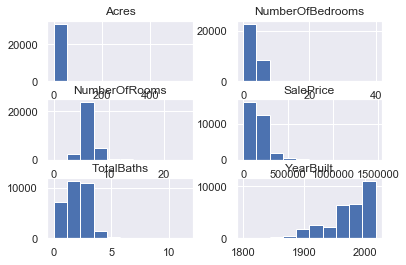

In [77]:
all_data.hist()

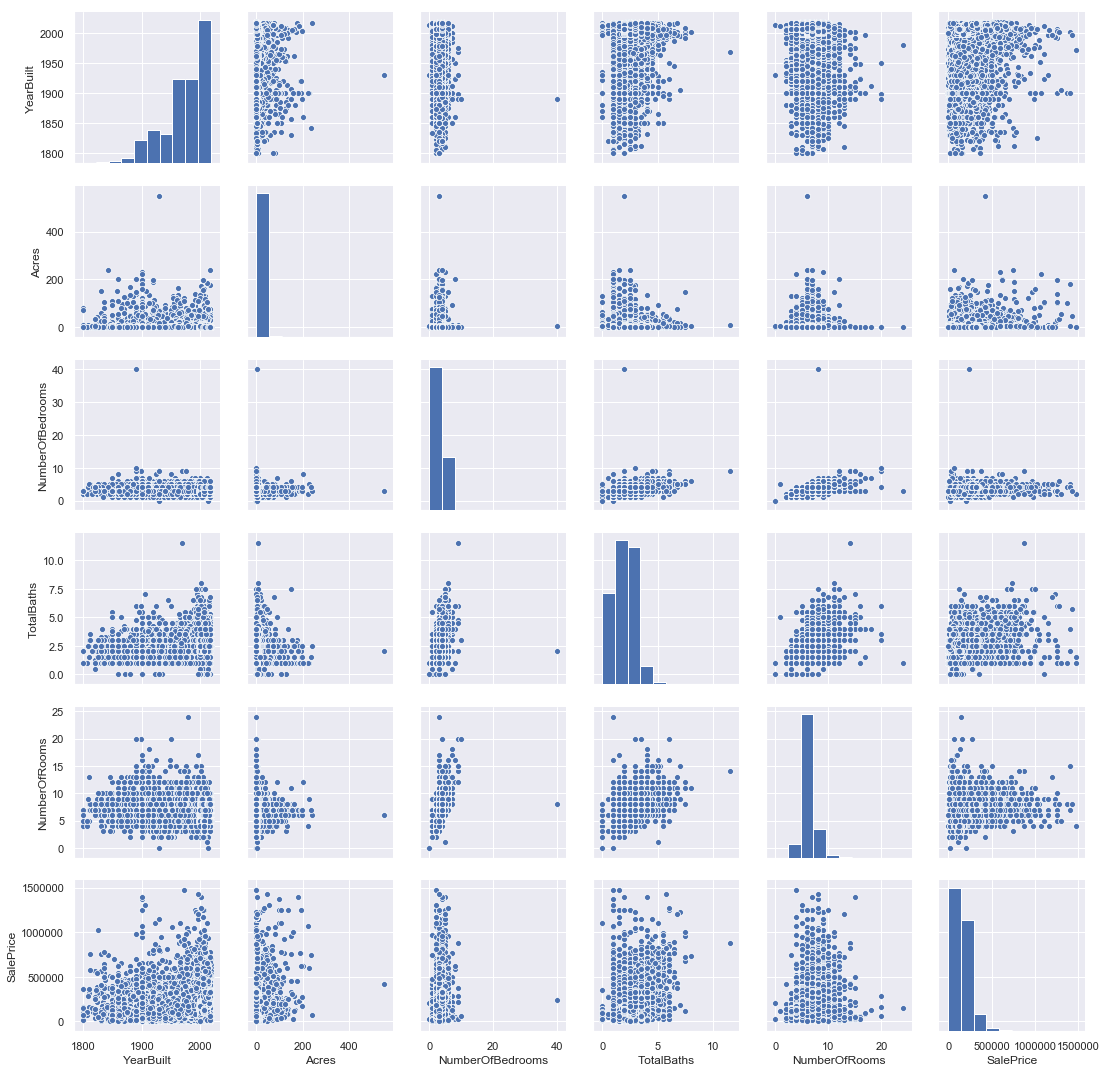

In [78]:
columns = [ "YearBuilt", "Acres", "FinishedArea", "LandUse", "NumberOfBedrooms", "TotalBaths", "NumberOfRooms", "SalePrice"]
sns.pairplot(all_data[columns])

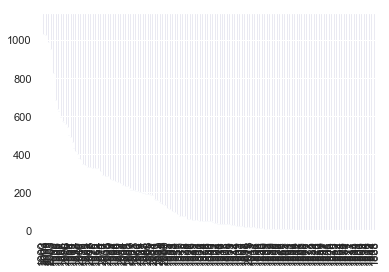

In [79]:
all_data['YearBuilt'].value_counts().plot(kind="bar")

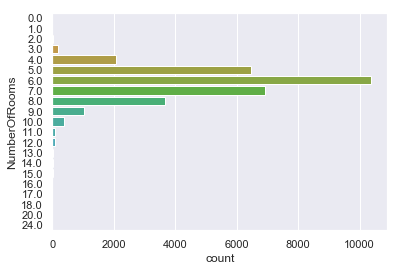

In [80]:
sns.countplot(y=all_data['NumberOfRooms'])

In [81]:
all_data.groupby(["County", "LandUse"]).size()

County    LandUse                                  
Franklin  414.0                                           1
          500.0                                          14
          510                                           917
          511                                            26
          520                                             9
          550                                            64
          553.0                                           2
          591.0                                           1
          685                                             1
Licking   100 Agricultural Vacant Land                    1
          101 Cash - grain or general farm              103
          111 CAUV general farm                         409
          113 CAUV dairy                                  3
          115 CAUV fruit & nut                            1
          120 Forest lands                                5
          122 CAUV - Timber                     

In [ ]:
sns.pairplot(all_data[columns], hue="FinishedArea")

/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [ ]:
sns.boxplot(x="SalePrice", y="YearBuilt", data=df_redux)